In [1]:
import pandas as pd 
import numpy as np
import ast

# UHF Neighborhood to Zipcode Mapping

In [ ]:
bronx_neighborhoods = {}

bronx_neighborhoods["Crotona - Tremont"] =  [10453, 10457, 10460]
bronx_neighborhoods['Fordham - Bronx Park'] =  [10458, 10467, 10468]
bronx_neighborhoods['High Bridge - Morrisania'] = [10451, 10452, 10456]
bronx_neighborhoods['Hunts Point - Mott Haven'] = [10454, 10455, 10459, 10474]
bronx_neighborhoods['Kingsbridge'] = [10463, 10471] #
bronx_neighborhoods['Northeast Bronx'] = [10466, 10469, 10470, 10475]
bronx_neighborhoods['Pelhem - Throgs Neck'] = [10461, 10462,10464, 10465, 10472, 10473]

In [ ]:
brooklyn_neighborhoods = {}

brooklyn_neighborhoods["Bedford Stuyvesant - Crown Heights"] =  [11212, 11213, 11216, 11233, 11238]
brooklyn_neighborhoods["Bensonhurst - Bay Ridge"] =  [ 11209, 11214, 11228]
brooklyn_neighborhoods["Borough Park"] = [11204, 11218, 11219, 11230]
brooklyn_neighborhoods["Canarsie - Flatlands"] = [11234, 11236, 11239]
brooklyn_neighborhoods["Coney Island - Sheepshead Bay"] = [11223, 11224, 11229, 11235]
brooklyn_neighborhoods["Downtown - Heights - Slope"] = [11201, 11205, 11215, 11217, 11231]
brooklyn_neighborhoods["East Flatbush - Flatbush"] =[11203, 11210, 11225, 11226]
brooklyn_neighborhoods["East New York"] = [11207, 11208]
brooklyn_neighborhoods["Greenpoint"] = [11211, 11222]
brooklyn_neighborhoods["Sunset Park"] = [11220, 11232]
brooklyn_neighborhoods["Williamsburg - Bushwick"] = [11206, 11221, 11237]

In [ ]:
manhattan_neighborhoods = {}

manhattan_neighborhoods["Central Harlem - Morningside Heights"]= [10026, 10027, 10030, 10037, 10039]
manhattan_neighborhoods["Chelsea - Clinton"]= [10001, 10011, 10018, 10019, 10020, 10036]
manhattan_neighborhoods["East Harlem"]= [10029, 10035]
manhattan_neighborhoods["Gramercy Park - Murray Hill"]= [10010, 10016, 10017, 10022]
manhattan_neighborhoods["Greenwich Village - Soho"]= [10012, 10013, 10014]
manhattan_neighborhoods["Lower Manhattan"]= [10004, 10005, 10006, 10007, 10038, 10280]
manhattan_neighborhoods["Union Square - Lower East Side"]= [10002, 10003, 10009]
manhattan_neighborhoods["Upper East Side"]= [10021, 10028, 10044, 10128]
manhattan_neighborhoods["Upper West Side"]= [10023, 10024, 10025]
manhattan_neighborhoods["Washington Heights - Inwood"]= [10031, 10032, 10033, 10034, 10040]

In [ ]:
queens_neighborhoods = {}

queens_neighborhoods["Bayside - Little Neck"]=[11361, 11362, 11363, 11364]
queens_neighborhoods["Flushing - Clearview"]= [11354, 11355, 11356, 11357, 11358, 11359, 11360]
queens_neighborhoods["Fresh Meadows"] =[11365, 11366, 11367]
queens_neighborhoods["Jamaica"]= [11412, 11423, 11432, 11433, 11434, 11435, 11436]
queens_neighborhoods["Long Island City - Astoria"] =[11101, 11102, 11103, 11104, 11105, 11106]
queens_neighborhoods["Ridgewood - Forest Hills"] =[11374, 11375, 11379, 11385]
queens_neighborhoods["Rockaway"] =[11691, 11692, 11693, 11694, 11695, 11697]
queens_neighborhoods["Southeast Queens"]= [11004, 11005, 11411, 11413, 11422, 11426, 11427, 11428, 11429]
queens_neighborhoods["Southwest Queens"]= [11414, 11415, 11416, 11417, 11418, 11419, 11420, 11421]
queens_neighborhoods["West Queens"] = [11368, 11369, 11370, 11372, 11373, 11377, 11378]

In [ ]:
staten_neighborhoods = {}

staten_neighborhoods["Port Richmond"]= [10302, 10303, 10310]
staten_neighborhoods["South Beach - Tottenville"]=  [10306, 10307, 10308, 10309, 10312]
staten_neighborhoods["Stapleton - St. George"]=  [10301, 10304, 10305]
staten_neighborhoods["Willowbrook"]=  [10314]

In [ ]:
queens_neighborhoods['Bayside Little Neck'] = [11361, 11362, 11363, 11364]
brooklyn_neighborhoods['Bed-Stuy'] = [11212, 11213, 11216, 11233, 11238]
manhattan_neighborhoods['Chelsea-Clinton'] = [10001, 10011, 10018, 10019, 10020, 10036]
bronx_neighborhoods['Crotona-Tremont'] = [10453, 10457, 10460]
brooklyn_neighborhoods['Downtown-Heights'] = [11201, 11205, 11215, 11217, 11231]
bronx_neighborhoods['Fordham - Bronx Pk'] = [10458, 10467, 10468]
queens_neighborhoods['LIC, Astoria'] = [11101, 11102, 11103, 11104, 11105, 11106]
bronx_neighborhoods['Pelham'] = [10461, 10462,10464, 10465, 10472, 10473]
manhattan_neighborhoods['Upper Eastside'] = [10021, 10028, 10044, 10128]
staten_neighborhoods['Willbrook'] = [10314]

In [ ]:
filename = "nyc-census-2010.xlsx"

uhf = pd.read_excel(filename, sheet_name="2010 UHF",skiprows = 3)
uhf = uhf.iloc[:42,:]
uhf['zipcode_list'] = [ast.literal_eval(i)for i in uhf['zipcodes'].values.tolist()]
uhf = uhf.set_index(
    ['utf_name','Neighborhood','borough','Population','no_code']).zipcode_list.apply(
    pd.Series).stack().reset_index()
uhf = uhf.drop(columns='level_5')
uhf = uhf.rename(columns={0:"zipcode"})
uhf.zipcode = uhf.zipcode.astype(int)
uhf = uhf.sort_values(by='zipcode')

# NYC Zipcode Data Aggregation

In [175]:
import os

directory = "zipcode_data"

zipcode_df = pd.DataFrame(data=zipcode_set,columns = ['zipcode'])
#zipcode_set = list(zipcode_set)[20:] iterate through files and collect all nans
#zipcode_set += [np.nan]
for filename in os.listdir(directory):
    if filename.endswith(".csv"):
        print(filename)
        df = pd.read_csv(directory + "/" + filename)
        day = filename.split("_")[-1][2:len(".csv")]
        df['total_%s'%(day)] = df.Total
        df['positive_%s'%(day)] = df.Positive
        remove_cols = set(df.columns).intersection(['MODZCTA','Positive','Total','zcta_cum.perc_pos'])
        zipcode_df = pd.merge(zipcode_df, df, left_on='zipcode', right_on='MODZCTA').drop(columns = remove_cols)
    


NameError: name 'zipcode_set' is not defined

In [ ]:
zipcode_positive = zipcode_df.iloc[:,["positive" in i for i in zipcode_df.columns]].transpose()
zipcode_positive.columns = zipcode_df.zipcode
zipcode_positive = zipcode_positive.reset_index()
zipcode_positive['april_date'] = list([int(i.split("_")[1]) for i in list(zipcode_positive['index'])])
zipcode_positive = zipcode_positive.sort_values(by='april_date')
zipcode_positive.to_csv("april_zipcode_positive.csv")

In [ ]:
zipcode_total = zipcode_df.iloc[:,["total" in i for i in zipcode_df.columns]].transpose()
zipcode_total.columns = zipcode_df.zipcode
zipcode_total = zipcode_total.reset_index()
zipcode_total['april_date'] = list([int(i.split("_")[1]) for i in list(zipcode_total['index'])])
zipcode_total = zipcode_total.sort_values(by='april_date')
zipcode_total.to_csv("april_zipcode_total.csv")

Get the average rate of change for each zipcode

In [ ]:
average_roc = []

for i in list(zipcode_positive.columns)[1:-2]:
    average_roc += [np.average(np.diff(zipcode_positive[i]) / np.diff(zipcode_positive['april_date']))]

sorted(list(zip(average_roc,list(zipcode_positive.columns)[1:-2])),reverse=True)


# Transportation Equality

In [ ]:
eq = pd.read_csv("nyc_neighborhood_equality.csv")
eq['neighborhood_split'] = eq['Neighborhood Name'].str.split("/")
eq = eq.set_index(
    ['Rank','Borough', 'Accessible Jobs',
       'Median Income', 'Population']).neighborhood_split.apply(
    pd.Series).stack().reset_index()
eq = eq.drop(columns='level_5')
eq = eq.rename(columns={0:"neighborhood"})
eq = eq.sort_values(by='Rank')

In [ ]:
eq['grouped_neighborhood'] = eq.neighborhood.str.split("(",expand=True).iloc[:,0]

In [ ]:
eq_text = eq.groupby(['grouped_neighborhood'])['neighborhood'].agg(list).reset_index(drop=False)


In [ ]:
eq_num = eq.groupby(['grouped_neighborhood'])['Rank','Accessible Jobs', 'Median Income',
                                     'Population'].agg(np.mean).reset_index(drop=False)


eq_merge = pd.merge(eq_text,eq_num,on='grouped_neighborhood')

In [ ]:
eq_name = set()
for grouped in eq_merge.grouped_neighborhood:
    for utf in uhf.utf_name:
        if grouped in utf:
            eq_name = eq_name.union([grouped])
            print(grouped,utf)

In [ ]:
eq_merge.sort_values(by=['Population'])

In [ ]:
uhf.sort_values(by=['Population'])

# NYC Population FactFinder

In [ ]:
import urllib.request 
request_url = urllib.request.urlopen('https://factfinder-api.herokuapp.com/search?q=QN53')
response = request_url.read().decode('utf-8')
ast.literal_eval(response)

In [ ]:
import urllib.request
import ast
potential_nta = []
for i in range(8500,9000):
    try:
        url = "https://factfinder-api.herokuapp.com/selection/%s"%(i)
        request_url = urllib.request.urlopen(url)
    except:
        print(url,"FAILED")
        continue
    response = request_url.read().decode('utf-8')
    dict_temp = ast.literal_eval(response)
    if len(dict_temp['features']) == 1:
        potential_nta += [i]
    if i % 100 == 0:
        print(i,len(potential_nta),print(potential_nta))



In [ ]:
import urllib.request
import ast
potential_nta = []
for i in remain[:1000]:
    try:
        url = "https://factfinder-api.herokuapp.com/selection/%s"%(i)
        request_url = urllib.request.urlopen(url)
    except:
        print(url,"FAILED")
        continue
    response = request_url.read().decode('utf-8')
    dict_temp = ast.literal_eval(response)
    if len(dict_temp['features']) == 1:
        potential_nta += [i]
    if i % 100 == 0:
        print(i,len(potential_nta),print(potential_nta))



In [ ]:
import urllib.request
import ast
potential_nta = []
for i in remain[6000]:
    try:
        url = "https://factfinder-api.herokuapp.com/selection/%s"%(i)
        request_url = urllib.request.urlopen(url)
    except:
        print(url,"FAILED")
        continue
    response = request_url.read().decode('utf-8')
    dict_temp = ast.literal_eval(response)
    if len(dict_temp['features']) == 1:
        potential_nta += [i]
    if i % 100 == 0:
        print(i,len(potential_nta),print(potential_nta))



In [ ]:
import urllib.request
import ast
potential_nta = []
pot_ids = [32773, 32787, 28, 31, 32, 35, 36, 44, 50, 56, 57, 65, 87, 32858, 92, 99, 100, 111, 112, 32887, 123, 32893, 128, 129, 130, 132, 147, 32915, 153, 164, 169, 171, 172, 174, 180, 181, 182, 183, 184, 186, 189, 190, 192, 194, 195, 197, 199, 201, 202, 204, 209, 210, 211, 32984, 217, 219, 32988, 32990, 226, 32996, 229, 231, 237, 241, 242, 243, 247, 249, 250, 251, 255, 258, 259, 260, 274, 275, 276, 285, 286, 289, 33057, 33058, 294, 305, 326, 33101, 33102, 335, 33105, 338, 33106, 33113, 33114, 33117, 358, 361, 33133, 386, 389, 391, 415, 427, 443, 444, 445, 446, 457, 461, 462, 33236, 472, 473, 33246, 33247, 33248, 33249, 490, 492, 499, 502, 503, 507, 508, 509, 510, 513, 514, 523, 524, 525, 526, 33296, 529, 532, 533, 534, 536, 538, 545, 546, 33313, 33315, 557, 33333, 574, 577, 594, 599, 600, 605, 33374, 609, 610, 33381, 33384, 617, 33385, 33386, 627, 628, 629, 631, 632, 33404, 33409, 648, 33420, 654, 33423, 33424, 33426, 659, 660, 663, 665, 666, 667, 668, 669, 33437, 33438, 673, 33449, 694, 707, 33497, 33498, 33499, 734, 735, 737, 738, 744, 754, 756, 757, 33526, 33530, 33531, 33532, 771, 772, 775, 777, 778, 779, 782, 785, 787, 788, 790, 792, 795, 796, 797, 806, 808, 809, 816, 819, 820, 821, 840, 33609, 843, 33614, 33615, 850, 33622, 856, 33632, 33635, 33637, 33639, 33645, 882, 883, 33656, 33657, 890, 891, 892, 33658, 894, 895, 33659, 897, 33661, 899, 900, 33663, 33664, 33665, 33666, 33668, 33669, 33670, 33675, 909, 33676, 33677, 912, 913, 914, 915, 916, 917, 918, 33678, 33679, 33680, 922, 33682, 33685, 33688, 926, 33692, 33694, 929, 33695, 931, 932, 33696, 935, 937, 939, 941, 942, 944, 945, 946, 947, 951, 954, 955, 957, 960, 961, 962, 964, 967, 968, 33735, 33736, 972, 974, 975, 976, 977, 978, 981, 982, 983, 985, 987, 991, 992, 994, 1001, 1003, 1004, 1006, 1009, 1014, 1015, 1016, 1023, 1024, 1025, 1026, 1027, 1030, 1031, 1034, 1036, 1039, 1040, 1045, 1047, 1048, 1050, 1051, 1052, 1057, 1058, 1059, 1060, 1061, 1062, 1063, 33825, 1065, 1066, 1067, 33827, 1071, 1072, 1073, 1074, 1076, 1077, 1078, 1080, 1082, 1084, 1095, 1101, 1103, 1104, 1105, 33879, 1116, 1122, 1123, 1126, 1127, 1128, 1130, 1135, 1137, 1138, 1139, 1140, 1141, 1142, 1145, 1148, 1149, 1150, 1151, 1152, 1153, 1156, 1157, 1158, 1159, 1160, 1161, 1166, 1167, 1168, 1169, 1170, 1171, 1174, 1175, 1177, 1178, 1179, 1180, 1181, 1182, 1185, 1186, 1187, 1189, 1190, 1192, 1194, 1196, 1197, 1198, 1199, 1200, 1201, 1202, 1203, 1204, 1206, 1207, 1209, 1210, 1211, 1212, 1213, 1215, 33983, 1217, 33984, 1219, 1220, 1221, 1222, 1223, 33985, 1225, 1226, 33986, 1236, 1247, 1249, 1250, 1252, 1253, 1255, 1259, 1263, 1266, 1267, 1268, 34037, 1272, 34041, 1274, 1275, 1276, 34042, 1278, 1279, 1282, 1283, 1286, 1289, 34057, 34059, 1292, 1293, 34060, 1295, 34064, 1298, 1302, 1303, 1306, 1309, 1310, 1313, 1316, 1319, 1325, 1326, 1327, 1329, 1330, 1331, 1332, 1333, 1334, 1335, 1336, 1337, 1338, 1339, 1340, 1341, 1342, 1343, 1345, 1348, 1351, 1353, 1354, 1358, 34131, 1365, 34134, 1367, 34135, 1369, 1370, 34142, 1376, 34145, 34146, 34147, 1380, 34148, 1382, 1383, 1384, 1385, 1386, 34149, 34150, 34151, 1393, 1395, 1397, 1398, 1400, 1401, 1404, 1405, 1411, 1413, 1418, 1419, 1423, 1424, 1425, 1432, 1433, 34201, 1435, 1436, 1437, 1438, 34202, 1443, 1444, 1446, 1447, 1448, 1449, 1450, 34218, 1452, 1456, 1457, 1458, 1459, 34228, 1461, 1462, 34229, 34230, 34231, 1466, 1467, 1468, 1469, 34241, 1475, 1479, 1480, 1482, 1483, 34250, 34251, 1486, 1487, 1490, 1491, 1496, 1498, 1501, 1502, 1504, 1507, 1508, 1509, 1512, 34281, 1514, 1519, 1520, 1521, 34289, 1523, 34292, 1526, 34296, 1529, 1530, 1531, 34299, 1533, 1534, 1536, 1537, 1538, 34307, 1540, 1542, 1545, 34314, 1547, 1552, 1554, 1556, 1558, 1561, 1562, 1565, 1569, 1571, 1572, 1573, 1574, 1575, 1576, 1577, 1578, 1581, 1585, 1591, 1592, 1593, 1594, 1595, 1596, 1597, 1598, 1600, 1601, 34368, 34369, 34370, 34371, 1607, 1610, 1611, 1617, 1620, 1621, 1622, 1623, 1625, 1626, 1628, 1629, 34404, 1637, 1639, 1640, 1641, 1644, 1645, 34413, 34414, 1648, 34415, 34416, 34417, 1652, 1653, 34418, 1655, 34419, 1657, 34420, 1659, 34421, 1662, 1663, 1667, 1668, 1669, 1670, 1671, 1674, 1676, 1677, 1678, 1682, 1683, 1686, 1695, 1696, 1697, 1698, 1701, 1702, 1703, 1704, 1705, 1706, 1707, 1708, 1709, 1710, 1711, 1712, 1713, 1714, 1716, 1717, 1718, 1719, 1720, 34484, 34487, 1723, 34488, 1725, 34492, 34495, 1728, 1729, 1730, 1731, 1734, 1735, 1736, 1737, 1738, 1739, 1740, 34502, 34503, 34504, 1744, 34505, 1746, 1747, 34508, 1751, 1755, 34524, 1757, 1758, 34525, 1762, 1763, 1767, 1770, 1771, 1772, 1773, 1774, 1775, 1777, 1778, 1779, 1780, 1783, 1784, 1788, 1789, 1790, 1791, 1796, 1799, 1801, 1802, 1803, 1805, 1806, 1810, 1811, 1813, 1814, 34585, 1819, 1822, 1823, 1825, 34594, 1827, 34596, 1834, 1835, 1836, 1837, 1840, 1842, 1843, 1844, 1845, 34611, 1847, 1848, 1849, 1850, 1851, 34612, 34613, 34615, 34617, 1856, 34620, 1859, 1861, 1865, 1868, 1869, 1870, 1871, 1872, 1873, 1875, 1882, 1883, 1884, 1887, 1889, 1890, 1892, 1894, 1902, 34671, 34672, 1906, 1907, 1909, 1911, 1912, 1914, 1915, 1917, 1918, 34690, 1925, 1926, 34693, 1929, 1932, 1933, 1934, 1935, 34701, 1937, 1939, 1941, 1945, 1946, 1947, 1950, 34719, 34720, 1953, 34721, 34722, 1956, 34723, 1959, 1961, 1963, 1966, 1969, 1973, 1976, 1977, 1983, 1984, 1986, 1988, 1989, 1990, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 34762, 2000, 2001, 34763, 2005, 2008, 2010, 2011, 2012, 2013, 2016, 2017, 2019, 2021, 34792, 2025, 2026, 2028, 2036, 2037, 2038, 2040, 2042, 2044, 2045, 2046, 2047, 2052, 34820, 34824, 2060, 2061, 2065, 2066, 2069, 2070, 2071, 2072, 2073, 2074, 2076, 2080, 2081, 2083, 34851, 2086, 2090, 2096, 2097, 2098, 2099, 2100, 34866, 34869, 34870, 2104, 2105, 34871, 2107, 2108, 34872, 2110, 34873, 2114, 2117, 2119, 2121, 2123, 2125, 2126, 2127, 2128, 2130, 2132, 2133, 2134, 2140, 2142, 2146, 2147, 2148, 2150, 2151, 2152, 2153, 2154, 34918, 34919, 34923, 34925, 34926, 2164, 2165, 2169, 2170, 2171, 2172, 2173, 2176, 2177, 2178, 34948, 2181, 34949, 2183, 2184, 2185, 34950, 34955, 2188, 2189, 2191, 2193, 2194, 2195, 2196, 2197, 2203, 2206, 2211, 2214, 2216, 2218, 2219, 2220, 2223, 2224, 2226, 2228, 2230, 2231, 2233, 2234, 2235, 2236, 2247, 2248, 2253, 2255, 2257, 2258, 2261, 2263, 2265, 2267, 2268, 2269, 2271, 2273, 2274, 2277, 2278, 2281, 2282, 2283, 2285, 35053, 2287, 35055, 35056, 2290, 2292, 2294, 2297, 2300, 2301, 2303, 2305, 2306, 2307, 2308, 2309, 2310, 2311, 2314, 35084, 35085, 2319, 2320, 2321, 2324, 2325, 2326, 2329, 2331, 2332, 35100, 35101, 2335, 2336, 2342, 2347, 2349, 2350, 2351, 2352, 2355, 2357, 2359, 2360, 2364, 2365, 2366, 2367, 2368, 35137, 2370, 35138, 2372, 2373, 2378, 2380, 2381, 35148, 35151, 2385, 2387, 35156, 2389, 35158, 2391, 35159, 2393, 35165, 2398, 35166, 35168, 2401, 35169, 2403, 35170, 2405, 2408, 2409, 2411, 2412, 2413, 2414, 2418, 2420, 2422, 35191, 2425, 2427, 2428, 2429, 2430, 2431, 2432, 35197, 2434, 2435, 35203, 2439, 35208, 2443, 2446, 35215, 2450, 2456, 35227, 2460, 2462, 2463, 2465, 2467, 2470, 2471, 2474, 2478, 2479, 2480, 2485, 2486, 2489, 2499, 2501, 2502, 2505, 2509, 2517, 2519, 2520, 2521, 2522, 2523, 35287, 35292, 2527, 2528, 2529, 35306, 2539, 35307, 2541, 2542, 2543, 35309, 2545, 2546, 35313, 2548, 2552, 2554, 2555, 2557, 2559, 2562, 2565, 2568, 2569, 2573, 2576, 2577, 2581, 2587, 2590, 2594, 2596, 35365, 2601, 2602, 2603, 2605, 2607, 2608, 2609, 2614, 2615, 2626, 2633, 2638, 35407, 2640, 2643, 2644, 2645, 2646, 35412, 2651, 2653, 2654, 2667, 2671, 2678, 2679, 35446, 35447, 35448, 2683, 2685, 2687, 2689, 2693, 2694, 2701, 2702, 2703, 2704, 2707, 2708, 2709, 35477, 2711, 35478, 35479, 35483, 2717, 2718, 2719, 35493, 2727, 35495, 2729, 35496, 35497, 2740, 2743, 2744, 2745, 2748, 2755, 2756, 2757, 35523, 35526, 2760, 35530, 35531, 2764, 2765, 35532, 2767, 35533, 2769, 2770, 2771, 35535, 2773, 35537, 2775, 35539, 2779, 2785, 2786, 2788, 2790, 2792, 2797, 2798, 35568, 2802, 2826, 2839, 2840, 35608, 2842, 2843, 2845, 2846, 2848, 2849, 2864, 35638, 35639, 2874, 2876, 2877, 2889, 2890, 2894, 2897, 2912, 35687, 2922, 2925, 2926, 35699, 35700, 2933, 2934, 2935, 2936, 2937, 35701, 35703, 2945, 2954, 2959, 35738, 35739, 2972, 2973, 2974, 35740, 35743, 2978, 35746, 35747, 35748, 35750, 35751, 35754, 2987, 2988, 2989, 2992, 35764, 2998, 35768, 35769, 3003, 3004, 3009, 3010, 35777, 35778, 35783, 3020, 3021, 3027, 3028, 3029, 3032, 3033, 3034, 35800, 3042, 35811, 35813, 35817, 35821, 3055, 35830, 3063, 39686, 3068, 35840, 3074, 35842, 3077, 3078, 3082, 3096, 3097, 35864, 3100, 3102, 3103, 3104, 3105, 3108, 35880, 3113, 3115, 3117, 3118, 35885, 3120, 35888, 3130, 3132, 3133, 3136, 3141, 3142, 3144, 3145, 35918, 3151, 3161, 3162, 3163, 3164, 3166, 3168, 3169, 3173, 3175, 3180, 3184, 3185, 3187, 3190, 3192, 3196, 3198, 3199, 3201, 3206, 3207, 3208, 3212, 3213, 3214, 3217, 3220, 3224, 3225, 3226, 3228, 3229, 3230, 3231, 3232, 3234, 3236, 3237, 3244, 3252, 3254, 3256, 3258, 3259, 3273, 3283, 3286, 3291, 3293, 3294, 3296, 3298, 3299, 3303, 3311, 3312, 3313, 3314, 3315, 3316, 3319, 3322, 3323, 3324, 36094, 36095, 3328, 3330, 3331, 36098, 3333, 36102, 3339, 3340, 3348, 3349, 3358, 3363, 3364, 3368, 3369, 3371, 3372, 3374, 36143, 3378, 3380, 3382, 3383, 3387, 36156, 3396, 3402, 36172, 3409, 3413, 3414, 3415, 3416, 3417, 3418, 36182, 36189, 36190, 36196, 3430, 3433, 3437, 3450, 3451, 3457, 3458, 3460, 3461, 36228, 36230, 3467, 3470, 3472, 3473, 3474, 3475, 3476, 3477, 36240, 36241, 3480, 36242, 36244, 3484, 3486, 3487, 3491, 3492, 3493, 3494, 3495, 3496, 3497, 3498, 3499, 3500, 3501, 3507, 3508, 3512, 3514, 3516, 3528, 3529, 3531, 3532, 36303, 3556, 3557, 3558, 3560, 3561, 3563, 3567, 3568, 3569, 36342, 3576, 3577, 3578, 3580, 3581, 3585, 3588, 3591, 36360, 36361, 3594, 36362, 36367, 3605, 3607, 3609, 3615, 3616, 3626, 36394, 3628, 3629, 3631, 3635, 36407, 3644, 3655, 3666, 3667, 3668, 3671, 3683, 3685, 3698, 3699, 3700, 3705, 3719, 3720, 3721, 3722, 3734, 3735, 3770, 3775, 3777, 36547, 36550, 36551, 3785, 3786, 3787, 3788, 3789, 3790, 3791, 3792, 3793, 3794, 3797, 3802, 36576, 3818, 36589, 36590, 36591, 36592, 36593, 36594, 3828, 3833, 3834, 3844, 3846, 36615, 3849, 3855, 3857, 3861, 3862, 3863, 36629, 3867, 3869, 3870, 3871, 3873, 3876, 36644, 36651, 3889, 3894, 3896, 3897, 36664, 3901, 3907, 3914, 3915, 3916, 3918, 3921, 3923, 3924, 3925, 3926, 36692, 36693, 36710, 36717, 36718, 3951, 36719, 36720, 3957, 3958, 3959, 3960, 3961, 3963, 3964, 3965, 3966, 3967, 3968, 3969, 36746, 3980, 36748, 3983, 36754, 3989, 3990, 3991, 3994, 3996, 3999, 4001, 4002, 4003, 4004, 4008, 4009, 4010, 4011, 4012, 4013, 4015, 4016, 4017, 4018, 4019, 4020, 4026, 4029, 4039, 4040, 4045, 36817, 4056, 4060, 4062, 4064, 4066, 4067, 4070, 4071, 4076, 36857, 4092, 36873, 36875, 4110, 4112, 4116, 4123, 4124, 4126, 4128, 4129, 4130, 4132, 4133, 4134, 4135, 4137, 4138, 4142, 4147, 4150, 4153, 4154, 4157, 4160, 4169, 36941, 4175, 4176, 4179, 4181, 36954, 36955, 4188, 36956, 4200, 4201, 4202, 36973, 36976, 4212, 4213, 4218, 4225, 4237, 4240, 4243, 4256, 4259, 4267, 4273, 37051, 37056, 4290, 4291, 37059, 37065, 4299, 4306, 4315, 37094, 37098, 37100, 4338, 37107, 4340, 4342, 4343, 4350, 4352, 4353, 4354, 4355, 37124, 4358, 4359, 4360, 37137, 4370, 37138, 37153, 4392, 4398, 4400, 37176, 4409, 37177, 4411, 4413, 4415, 4416, 4431, 4433, 37201, 4439, 4440, 4446, 4448, 4452, 4455, 4460, 37228, 4463, 37231, 4479, 4482, 37252, 4513, 4516, 4521, 4525, 4527, 4528, 4529, 37297, 37298, 4535, 4539, 37308, 4541, 4551, 4552, 4563, 4573, 4576, 4579, 4580, 4581, 4583, 4584, 4586, 4589, 4592, 4602, 4605, 4616, 37386, 4619, 37388, 4621, 4622, 4625, 4627, 4628, 4663, 37431, 4668, 4673, 4674, 4675, 4677, 4688, 4689, 4713, 37481, 4720, 37489, 37490, 4726, 37496, 4729, 4730, 4731, 4734, 37512, 4756, 4757, 4766, 4769, 4771, 37539, 37540, 37541, 37542, 37543, 37545, 37555, 4802, 37573, 4815, 4831, 4832, 4833, 37605, 37607, 4841, 37609, 4852, 4857, 37628, 4862, 4863, 4865, 4866, 37636, 4869, 4870, 4872, 4875, 37647, 37648, 37650, 4883, 37651, 37652, 37653, 37654, 37655, 37658, 4892, 37660, 4894, 37661, 4897, 4904, 4907, 37679, 4912, 4913, 37690, 37691, 37692, 37701, 4938, 4946, 4951, 4954, 4956, 37727, 4964, 37732, 4969, 4971, 4972, 4973, 37740, 37743, 4982, 4987, 4993, 5005, 5007, 5008, 5011, 5014, 5015, 5017, 5018, 5019, 5021, 5023, 37791, 5026, 5027, 5031, 5036, 5042, 5043, 37814, 5047, 37815, 5049, 37819, 5053, 5065, 37834, 5071, 37865, 5101, 5102, 5103, 5104, 5108, 5113, 5115, 37887, 5120, 5128, 37906, 5140, 5147, 5161, 37932, 37933, 5166, 5168, 5170, 5171, 5173, 5174, 5175, 5176, 5177, 37944, 5179, 5180, 5181, 5182, 5186, 37956, 5189, 5190, 5191, 5195, 5199, 5202, 5209, 5217, 5221, 5224, 5226, 5229, 5230, 38000, 5238, 5239, 5240, 5242, 5243, 5244, 5245, 5246, 5247, 5249, 5250, 5254, 5255, 5256, 5257, 5262, 5285, 5286, 5308, 5309, 38080, 5316, 5317, 5318, 5322, 5323, 5324, 5325, 5326, 5333, 5334, 5335, 5339, 5340, 5346, 38114, 5349, 38124, 38125, 5358, 5361, 5362, 5363, 5364, 5365, 5366, 5367, 5368, 5369, 5370, 38137, 38138, 38140, 38146, 38155, 5397, 5398, 5399, 5400, 5401, 38168, 5405, 38175, 38179, 5415, 38183, 5422, 5423, 5424, 5425, 38198, 5437, 38211, 5450, 5451, 5453, 5456, 5460, 5461, 5463, 5464, 38232, 5473, 5474, 5475, 5476, 5477, 5478, 38245, 5480, 5483, 5486, 38257, 5493, 5496, 5502, 38273, 38274, 5507, 38276, 38277, 5515, 5516, 5517, 5519, 5523, 5528, 5529, 5539, 5543, 5544, 5547, 38322, 5555, 5562, 5563, 5565, 5566, 5569, 5581, 5582, 5583, 5584, 5585, 5592, 5593, 5594, 5595, 5596, 5597, 5598, 5599, 38364, 5602, 5604, 38375, 5609, 5610, 38378, 5618, 33681, 5631, 5632, 5633, 5634, 38401, 5638, 38408, 5642, 38415, 5656, 5657, 5658, 5659, 5661, 38429, 5664, 5670, 5671, 5679, 5680, 5681, 5682, 5684, 5692, 5695, 5708, 5709, 5710, 5711, 5712, 38481, 5719, 5720, 5721, 5722, 38490, 5734, 38505, 5738, 38507, 38509, 5742, 38510, 38511, 38512, 5746, 38513, 38514, 5749, 5750, 38515, 38516, 5753, 38517, 38520, 38521, 38522, 38523, 38524, 38525, 38526, 38527, 38528, 5764, 38529, 38530, 38531, 5768, 5769, 5770, 5771, 38532, 38533, 38534, 38535, 38536, 38537, 38538, 38539, 38540, 38541, 38542, 38543, 38544, 38545, 38546, 38547, 38548, 38549, 38550, 5791, 38551, 38552, 38553, 38554, 38555, 38556, 38557, 38558, 38559, 38560, 5802, 38562, 38563, 5805, 38565, 38566, 38567, 5809, 38569, 5811, 5812, 38572, 38573, 38574, 38575, 5817, 38577, 5819, 5820, 5821, 5822, 38582, 38583, 5825, 5826, 5827, 5828, 38588, 38589, 38590, 38591, 38592, 38593, 38594, 5836, 38596, 38597, 38598, 38599, 38600, 38601, 38602, 5844, 38604, 38605, 38606, 38607, 38608, 5850, 38610, 38611, 38612, 5854, 38614, 38615, 38616, 5858, 38618, 38619, 38620, 38621, 38622, 38623, 38624, 38625, 38626, 38627, 5878, 5890, 5899, 5900, 5901, 5902, 38669, 5904, 5909, 5923, 5925, 5926, 5927, 5932, 5933, 5934, 5941, 5944, 5945, 5947, 5951, 5953, 5956, 5958, 5960, 5965, 5971, 38741, 5975, 5976, 5977, 5978, 5979, 38749, 5982, 5986, 5987, 5997, 5998, 6000, 6002, 6003, 6010, 6011, 6015, 38783, 38792, 6026, 38805, 6038, 38809, 38812, 38818, 6056, 38825, 6058, 6065, 6066, 6070, 6079, 6080, 6082, 6088, 6090, 38864, 38868, 6101, 38869, 38870, 38871, 6105, 6109, 38882, 6116, 6125, 6126, 6127, 6130, 6131, 38900, 6149, 6157, 6158, 6160, 6165, 6171, 6184, 6186, 6189, 6195, 6196, 6215, 6223, 6226, 6227, 6229, 6235, 6240, 6242, 6244, 6256, 6262, 6264, 6269, 6271, 6285, 6289, 6291, 6292, 39059, 6302, 6306, 6307, 6313, 6317, 6318, 6321, 6328, 6331, 39102, 6335, 39103, 39104, 6338, 6339, 39117, 6359, 39127, 39133, 6367, 6370, 39146, 6379, 6384, 6386, 6387, 6388, 39155, 6392, 6399, 6402, 6404, 6405, 39173, 39186, 39188, 39191, 6428, 6432, 6433, 6434, 6465, 39234, 6473, 6474, 6477, 39247, 6489, 6498, 39275, 6508, 39284, 6521, 6523, 6524, 6525, 6526, 6527, 6528, 6529, 39307, 6540, 6545, 6546, 6547, 6551, 6554, 6589, 39357, 39359, 6592, 39360, 39361, 6597, 6598, 6600, 6602, 39370, 6610, 39381, 6615, 6616, 6621, 6631, 6633, 6634, 6638, 39407, 6647, 6649, 6666, 6667, 39440, 39455, 39464, 39466, 39467, 39468, 6707, 6708, 39480, 39486, 39488, 6743, 39552, 39553, 6813, 6815, 6819, 6821, 6825, 6852, 6853, 6854, 6855, 6856, 6859, 6860, 6880, 6881, 39655, 6896, 6903, 6905, 6906, 6907, 6908, 6909, 6910, 6911, 6912, 6913, 6914, 6915, 6916, 6917, 6918, 6919, 6920, 6921, 6922, 6923, 6924, 6925, 6926, 6927, 6928, 6929, 6930, 39696, 39698, 6933, 6936, 6938, 6939, 39713, 6957, 6958, 39728, 6966, 6967, 6969, 6976, 39758, 6992, 6997, 6998, 6999, 7000, 7005, 7006, 7007, 7008, 7010, 7011, 7016, 7042, 7061, 7062, 39835, 39836, 7070, 7072, 7073, 7075, 7076, 7077, 7078, 39848, 39849, 39850, 7093, 7094, 7101, 7102, 7104, 7107, 7108, 7110, 7112, 7114, 7115, 7117, 7121, 7126, 39895, 7130, 39898, 7134, 7139, 7142, 7150, 7153, 7165, 7170, 7171, 7181, 7189, 7190, 7191, 7197, 7202, 7203, 7208, 7216, 7217, 7218, 7222, 7231, 7232, 7256, 7260, 7267, 7294, 7309, 7310, 7321, 7323, 7324, 7335, 7336, 7337, 7349, 7362, 7375, 7378, 7396, 7397, 7406, 7415, 7416, 7418, 7428, 7432, 7438, 7441, 7445, 7447, 7453, 7457, 7467, 7477, 7478, 7482, 7490, 7524, 7534, 7539, 7542, 7547, 7549, 7554, 7575, 7577, 7603, 7622, 7627, 7630, 7634, 7636, 7637, 7640, 7642, 7650, 7654, 7656, 7668, 7671, 7681, 7684, 7686, 7688, 7690, 7692, 7693, 7697, 7708, 7710, 7715, 7717, 7719, 7729, 7736, 7748, 7750, 7756, 7766, 7775, 7778, 7779, 7794, 7798, 7803, 7815, 7819, 7823, 7824, 7844, 7860, 7867, 7868, 7869, 7870, 7879, 7880, 7881, 7882, 7884, 7885, 7886, 7890, 7892, 7893, 7900, 7902, 7911, 7919, 7925, 7956, 7957, 7960, 7965, 7966, 7968, 7969, 7970, 7971, 7972, 7973, 7979, 7982, 7985, 7988, 7989, 7991, 7992, 7994, 7995, 7998, 7999, 8000, 8008, 8009, 8018, 8019, 8021, 8023, 8025, 8029, 8035, 8043, 8049, 8050, 8051, 8059, 8061, 8063, 8070, 8077, 8097, 8099, 8104, 8109, 8115, 8121, 8122, 8125, 8126, 8130, 8152, 8160, 8165, 8167, 8179, 8181, 8182, 8185, 8186, 8189, 8190, 8193, 8203, 8204, 8205, 8206, 8209, 8210, 8214, 8215, 8218, 8220, 8224, 8227, 8228, 8229, 8231, 8232, 8233, 8238, 8239, 8240, 8245, 8248, 8252, 8253, 8261, 8282, 8285, 8288, 8290, 8291, 8292, 8294, 8295, 8298, 8301, 8302, 8303, 8307, 8309, 8310, 8312, 8314, 8315, 8316, 8317, 8318, 8319, 8320, 8330, 8331, 8335, 8341, 8351, 8368, 8372, 8387, 8389, 8392, 8393, 8402, 8403, 8406, 8407, 8408, 8409, 8411, 8412, 8413, 8416, 8418, 8419, 8420, 8421, 8435, 8447, 8448, 8455, 8457, 8458, 8466, 8467, 8468, 8469, 8470, 8481, 8490, 8507, 8508, 8510, 8511, 8513, 8516, 8531, 8532, 8538, 8550, 8558, 8560, 8573, 8589, 8591, 8615, 8624, 8630, 8634, 8635, 8643, 8644, 8647, 8648, 8651, 8656, 8660, 8670, 8671, 8680, 8681, 8683, 8685, 8686, 8687, 8688, 8689, 8690, 8691, 8693, 8694, 8695, 8696, 8697, 8698, 8699, 8706, 8708, 8709, 8710, 8711, 8712, 8713, 8714, 8715, 8716, 8724, 8732, 8733, 8745, 8753, 8761, 8784, 8793, 8798, 8800, 8809, 8810, 8812, 8834, 8840, 8842, 8843, 8847, 8852, 8853, 8865, 8882, 8884, 8897, 8898, 8900, 8930, 8936, 8946, 8947, 8962, 8970, 8971, 8990, 8992, 8998, 9004, 9055, 9070, 9073, 9074, 9087, 9093, 9097, 9102, 9119, 9120, 9123, 9131, 9160, 9175, 9176, 9208, 9209, 9210, 9212, 9214, 9215, 9216, 9217, 9221, 9222, 9223, 9225, 9226, 9227, 9228, 9229, 9230, 9231, 9232, 9233, 9234, 9235, 9236, 9237, 9238, 9239, 9240, 9241, 9242, 9243, 9244, 9245, 9246, 9248, 9249, 9251, 9252, 9253, 9269, 9271, 9272, 9273, 9274, 9275, 9276, 9277, 9278, 9279, 9280, 9281, 9282, 9283, 9284, 9285, 9286, 9287, 9288, 9289, 9290, 9291, 9293, 9294, 9295, 9296, 9297, 9298, 9299, 9300, 9301, 9302, 9303, 9304, 9306, 9307, 9308, 9309, 9311, 9312, 9313, 9314, 9315, 9316, 9317, 9318, 9319, 9320, 9321, 9322, 9323, 9324, 9325, 9326, 9327, 9328, 9329, 9330, 9331, 9332, 9333, 9334, 9335, 9336, 9337, 9338, 9339, 9340, 9341, 9342, 9343, 9344, 9359, 9380, 9390, 9397, 9405, 9409, 9411, 9430, 9437, 9443, 9451, 9457, 9459, 9461, 9470, 9473, 9487, 9489, 9491, 9493, 9495, 9497, 9500, 9503, 9504, 9506, 9521, 9523, 9524, 9525, 9526, 9527, 9530, 9534, 9535, 9556, 9612, 9613, 9623, 9624, 9625, 9626, 9627, 9628, 9629, 9630, 9631, 9633, 9634, 9635, 9641, 9650, 9656, 9663, 9664, 9665, 9666, 9672, 9673, 9679, 9685, 9686, 9719, 9736, 9738, 9755, 9766, 34506, 9773, 9793, 9811, 9812, 9840, 9846, 9854, 9867, 9869, 9870, 9892, 9894, 9895, 9896, 9905, 9923, 9926, 9927, 9928, 9929, 9930, 9931, 9944, 9946, 9947, 9948, 9949, 9950, 9951, 9952, 9953, 9954, 9961, 9962, 9964, 9979, 9985, 9987, 10003, 10023, 10027, 10031, 10037, 10043, 10053, 10056, 10057, 10059, 10062, 10068, 10072, 10087, 10090, 10091, 10092, 10093, 10111, 10113, 10121, 10124, 10128, 10145, 10146, 10149, 10170, 10195, 10198, 10199, 10200, 10201, 10204, 10205, 10213, 10214, 10225, 10230, 10231, 10237, 10240, 10243, 10247, 10249, 10250, 10251, 10256, 10257, 10258, 10262, 10263, 10265, 10266, 10267, 10272, 10277, 10278, 10281, 10305, 10307, 10310, 10320, 10327, 10329, 10345, 10346, 10351, 10357, 10358, 10359, 10360, 10361, 10362, 10364, 10365, 10366, 10367, 10368, 10369, 10370, 10371, 10372, 10373, 10374, 10375, 10376, 10377, 10378, 10379, 10380, 10381, 10382, 10383, 10384, 10385, 10386, 10387, 10388, 10389, 10390, 10391, 10392, 10393, 10394, 10395, 10396, 10397, 10398, 10399, 10400, 10401, 10402, 10403, 10404, 10405, 10406, 10407, 10408, 10409, 10410, 10411, 10412, 10413, 10414, 10415, 10416, 10417, 10418, 10419, 10420, 10421, 10422, 10423, 10424, 10425, 10426, 10427, 10428, 10429, 10430, 10431, 10432, 10433, 10434, 10435, 10436, 10437, 10438, 10439, 10450, 10451, 10465, 10467, 10468, 10475, 10476, 10485, 10491, 10494, 10506, 10515, 10531, 10535, 10536, 10538, 10539, 10541, 10542, 10559, 10572, 10580, 10581, 10582, 10583, 10612, 10617, 10621, 10651, 10655, 10658, 10698, 10699, 10709, 10710, 10724, 10731, 10764, 10768, 10794, 10803, 10830, 10837, 10843, 10852, 10857, 10864, 10870, 10895, 10900, 10901, 10903, 10904, 10906, 10911, 10912, 10913, 10914, 10916, 10917, 10918, 10919, 10920, 10921, 10922, 10923, 10926, 10928, 10929, 10930, 10931, 10932, 10933, 10934, 10935, 10936, 10937, 10938, 10939, 10940, 10941, 10943, 10959, 10960, 10961, 10962, 10963, 10964, 10965, 10966, 10967, 10968, 10969, 10970, 10971, 10972, 10973, 10974, 10975, 10976, 10977, 10978, 10979, 10980, 10981, 10982, 10983, 10984, 10985, 10986, 10987, 10988, 10989, 10991, 10992, 10993, 10994, 10995, 10996, 10997, 10998, 10999, 11000, 11001, 11002, 11003, 11004, 11005, 11006, 11007, 11008, 11009, 11010, 11011, 11012, 11013, 11014, 11015, 11016, 11017, 11018, 11019, 11020, 11021, 11022, 11023, 11029, 11036, 11048, 11049, 11050, 11051, 11052, 11054, 11055, 11056, 11057, 11058, 11059, 11060, 11062, 11063, 11066, 11067, 11068, 11069, 11070, 11074, 11075, 11076, 11077, 11078, 11079, 11080, 11082, 11091, 11096, 11102, 11103, 11104, 11105, 11106, 11107, 11108, 11109, 11110, 11111, 11112, 11113, 11114, 11124, 11126, 11127, 11128, 11129, 11130, 11131, 11132, 11133, 11134, 11135, 11136, 11137, 11138, 11139, 11145, 11146, 11148, 11149, 11150, 11154, 11162, 11163, 11164, 11165, 11166, 11167, 11168, 11169, 11170, 11171, 11172, 11173, 11174, 11175, 11176, 11177, 11178, 11179, 11180, 11181, 11182, 11183, 11184, 11185, 11186, 11187, 11188, 11189, 11190, 11191, 11192, 11193, 11194, 11195, 11196, 11197, 11198, 11199, 11200, 11202, 11203, 11204, 11205, 11206, 11207, 11208, 11209, 11210, 11211, 11212, 11213, 11214, 11215, 11217, 11218, 11219, 11220, 11222, 11223, 11224, 11225, 11226, 11228, 11229, 11231, 11232, 11233, 11234, 11235, 11236, 11237, 11238, 11239, 11240, 11241, 11242, 11243, 11250, 11253, 11254, 11258, 11261, 11269, 11279, 11285, 11287, 11292, 11293, 11317, 11320, 11321, 11324, 11331, 11332, 11335, 11337, 11338, 11339, 11340, 11341, 11342, 11343, 11357, 11360, 11363, 11366, 11373, 11374, 11379, 11384, 11397, 11398, 11408, 11412, 11418, 11423, 11457, 11458, 11463, 11466, 11467, 11472, 11473, 11488, 11489, 11490, 11491, 11493, 11494, 11495, 11501, 11522, 11545, 11547, 11573, 11574, 11586, 11606, 11609, 11610, 11611, 11624, 11626, 11628, 11629, 11656, 11673, 11677, 11680, 11683, 11690, 11691, 11694, 11712, 11714, 11735, 11737, 11759, 11766, 11768, 11784, 11788, 11791, 11792, 11802, 11817, 11824, 11827, 11831, 11832, 11838, 11846, 11861, 11862, 11880, 11881, 11882, 11883, 11884, 11885, 11886, 11901, 11904, 11905, 11906, 11913, 11919, 11920, 11921, 11981, 11987, 12000, 12050, 12060, 12091, 12092, 12098, 12101, 12128, 12139, 12150, 12152, 12153, 12169, 12185, 12193, 12207, 12208, 12209, 12210, 12215, 12219, 12262, 12282, 12292, 12308, 12323, 12335, 12336, 12351, 12352, 12356, 12359, 12372, 12373, 12374, 12378, 12379, 12385, 12389, 12398, 12443, 12469, 12484, 12533, 12540, 12541, 12545, 12547, 12565, 12581, 12586, 12595, 12639, 12675, 12676, 12677, 12691, 12692, 12706, 12730, 12749, 12766, 12772, 12773, 12784, 12786, 12787, 12814, 12820, 12833, 12852, 12865, 12868, 12869, 12870, 12872, 12873, 12889, 12909, 12915, 12931, 12938, 12946, 12950, 12970, 12973, 12975, 12976, 12986, 12994, 12997, 12998, 13025, 13043, 13044, 13045, 13046, 13047, 13059, 13062, 13065, 13069, 13076, 13080, 13086, 13087, 13089, 13097, 13105, 13106, 13124, 13129, 13133, 13135, 13136, 13139, 13145, 13148, 13149, 13150, 13151, 13152, 13153, 13155, 13156, 13157, 13158, 13159, 13162, 13163, 13164, 13165, 13166, 13167, 13168, 13169, 13170, 13172, 13174, 13177, 13223, 13224, 13226, 13230, 13240, 13258, 13262, 13264, 13274, 13275, 13277, 13301, 13310, 13320, 13321, 13367, 13376, 13377, 13378, 13379, 13392, 13393, 13394, 13395, 13397, 13406, 13407, 13413, 13417, 13428, 13436, 13450, 13478, 13481, 13485, 13498, 13501, 13502, 13511, 13516, 13517, 13519, 13527, 13557, 13565, 13581, 13584, 13590, 13599, 13606, 13607, 13611, 13624, 13633, 13649, 13650, 13663, 13665, 13686, 13690, 13702, 13729, 13734, 13736, 13737, 13747, 13754, 13765, 13767, 13769, 13773, 13783, 13785, 13790, 13792, 13802, 13815, 13821, 13823, 13853, 13869, 13873, 13877, 13892, 13893, 13903, 13932, 13936, 13966, 14037, 14038, 14039, 14040, 14046, 14048, 14050, 14116, 14117, 14129, 14134, 14135, 14137, 14143, 14145, 14146, 14148, 14149, 14150, 14151, 14152, 14161, 14162, 14163, 14178, 14189, 14209, 14213, 14222, 14225, 14242, 14244, 14250, 14253, 14256, 14257, 14260, 14261, 14262, 14263, 14264, 14265, 14266, 14268, 14269, 14270, 14271, 14272, 14273, 14274, 14275, 14276, 14277, 14278, 14279, 14280, 14281, 14282, 14283, 14284, 14285, 14286, 14287, 14289, 14290, 14291, 14292, 14293, 14294, 14295, 14296, 14297, 14298, 14299, 14300, 14301, 14302, 14303, 14304, 14305, 14306, 14307, 14308, 14309, 14310, 14311, 14312, 14313, 14314, 14315, 14316, 14317, 14318, 14320, 14321, 14322, 14324, 14325, 14326, 14327, 14328, 14329, 14331, 14332, 14333, 14334, 14335, 14336, 14337, 14338, 14339, 14340, 14341, 14342, 14343, 14344, 14345, 14346, 14347, 14348, 14349, 14350, 14351, 14352, 14353, 14354, 14355, 14356, 14357, 14358, 14359, 14360, 14361, 14362, 14363, 14364, 14365, 14366, 14367, 14368, 14369, 14370, 14371, 14372, 14373, 14374, 14376, 14377, 14378, 14379, 14380, 14381, 14382, 14383, 14384, 14385, 14386, 14387, 14388, 14389, 14390, 14391, 14392, 14393, 14394, 14395, 14396, 14397, 14398, 14399, 14400, 14401, 14402, 14403, 14404, 14405, 14406, 14407, 14408, 14409, 14410, 14411, 14412, 14413, 14414, 14415, 14416, 14417, 14418, 14419, 14420, 14421, 14422, 14423, 14424, 14425, 14426, 14427, 14428, 14429, 14430, 14431, 14432, 14433, 14434, 14435, 14436, 14437, 14438, 14439, 14440, 14441, 14442, 14443, 14444, 14445, 14446, 14447, 14448, 14449, 14450, 14451, 14452, 14453, 14454, 14455, 14456, 14457, 14458, 14460, 14461, 14462, 14463, 14464, 14465, 14466, 14467, 14468, 14469, 14470, 14471, 14472, 14473, 14474, 14475, 14476, 14477, 14478, 14479, 14480, 14481, 14482, 14483, 14484, 14485, 14486, 14487, 14488, 14489, 14490, 14491, 14492, 14493, 14494, 14495, 14496, 14497, 14498, 14499, 14500, 14501, 14502, 14503, 14504, 14505, 14506, 14507, 14508, 14509, 14510, 14511, 14512, 14514, 14515, 14516, 14517, 14537, 14539, 14551, 14560, 14570, 14571, 14572, 14587, 14590, 14603, 14631, 14632, 14635, 14645, 14674, 14686, 14687, 14692, 14724, 14725, 14726, 14741, 14743, 14750, 14752, 14761, 14766, 14778, 14850, 14860, 14861, 14863, 14868, 14871, 14872, 14873, 14882, 14886, 14901, 14908, 14912, 14913, 14925, 14951, 14963, 14964, 14995, 14998, 14999, 15000, 15001, 15002, 15003, 15004, 15005, 15006, 15007, 15008, 15009, 15012, 15014, 15015, 15019, 15020, 15021, 15022, 15023, 15024, 15025, 15029, 15030, 15031, 15033, 15034, 15035, 15037, 15041, 15042, 15043, 15054, 15069, 15075, 15076, 15080, 15081, 15082, 15083, 15084, 15085, 15086, 15088, 15097, 15115, 15117, 15142, 15155, 15157, 15166, 15171, 15204, 15214, 15254, 15255, 15262, 15276, 15278, 15360, 15385, 15397, 15424, 15427, 15431, 15512, 15516, 15533, 15539, 15540, 15541, 15551, 15591, 15594, 15595, 15599, 15600, 15603, 15641, 15643, 15644, 15648, 15727, 15749, 15765, 15767, 15768, 15769, 15770, 15771, 15772, 15773, 15774, 15775, 15777, 15778, 15779, 15780, 15781, 15782, 15783, 15784, 15785, 15786, 15798, 15799, 15807, 15808, 15815, 15816, 15817, 15822, 15827, 15829, 15831, 15842, 15846, 15864, 15866, 15892, 15893, 15895, 15898, 15900, 15903, 15906, 15924, 15925, 15928, 15936, 15938, 15940, 15947, 15948, 15969, 15981, 15987, 15988, 15998, 15999, 16003, 16009, 16010, 16011, 16021, 16044, 16063, 16096, 16097, 16098, 16102, 16129, 16179, 16197, 16211, 16214, 16218, 16227, 16232, 16306, 16319, 16340, 16345, 16346, 16347, 16348, 16349, 16354, 16356, 16364, 16377, 16383, 16395, 16397, 16425, 16480, 16481, 16483, 16485, 16486, 16487, 16488, 16489, 16490, 16491, 16492, 16493, 16494, 16495, 16496, 16497, 16498, 16499, 16500, 16501, 16502, 16503, 16504, 16505, 16506, 16507, 16508, 16509, 16510, 16511, 16512, 16513, 16515, 16516, 16517, 16520, 16521, 16522, 16524, 16527, 16528, 16529, 16530, 16531, 16535, 16537, 16540, 16563, 16564, 16565, 16566, 16568, 16569, 16570, 16571, 16573, 16574, 16575, 16576, 16577, 16598, 16599, 16608, 16627, 16633, 16636, 16638, 16645, 16663, 16664, 16679, 16701, 16702, 16707, 16708, 16724, 16732, 16737, 16740, 16821, 16831, 16836, 16857, 16861, 16862, 16864, 16875, 16879, 16883, 16886, 16893, 16903, 16913, 16917, 16918, 16919, 16921, 16922, 16923, 16929, 16936, 16939, 16940, 16941, 16942, 16958, 16964, 16968, 16986, 16999, 17022, 17023, 17028, 17040, 17042, 17071, 17084, 17088, 17089, 17103, 17108, 17112, 17119, 17121, 17137, 17138, 17139, 17162, 17183, 17185, 17187, 17188, 17191, 17195, 17199, 17214, 17215, 17216, 17217, 17250, 17261, 17270, 17273, 17274, 17275, 17286, 17303, 17305, 17309, 17322, 17328, 17340, 17342, 17343, 17347, 17354, 17362, 17363, 17365, 17366, 17379, 17412, 17413, 17414, 17415, 17416, 17417, 17429, 17452, 17465, 17484, 17489, 17496, 17511, 17521, 17529, 17531, 17541, 17566, 17600, 17618, 17620, 17637, 17638, 17639, 17640, 17643, 17657, 17689, 17706, 17712, 17717, 17728, 17739, 17743, 17748, 17751, 17753, 17755, 17761, 17765, 17767, 17798, 17799, 17800, 17807, 17808, 17816, 17817, 17822, 17825, 17832, 17835, 17852, 17853, 17860, 17877, 17889, 17899, 17900, 17910, 17913, 17914, 17915, 17916, 17917, 17918, 17921, 17922, 17923, 17924, 17925, 17926, 17927, 17928, 17929, 17930, 17931, 17932, 17933, 17934, 17935, 17936, 17937, 17938, 17939, 17940, 17941, 17942, 17947, 17948, 17949, 17950, 17951, 17952, 17953, 17954, 17955, 17956, 17957, 17958, 17960, 17961, 17962, 17963, 17964, 17965, 17966, 17969, 17972, 17987, 17998, 18004, 18009, 18010, 18030, 18042, 18043, 18044, 18046, 18141, 18144, 18148, 18169, 18196, 18198, 18212, 18214, 18215, 18216, 18272, 18274, 18275, 18276, 18277, 18278, 18352, 18357, 18358, 18359, 18360, 18393, 18395, 18396, 18398, 18407, 18408, 18411, 18415, 18459, 18472, 18476, 18477, 18484, 18485, 18489, 18496, 18508, 18522, 18552, 18555, 18564, 18568, 18570, 18571, 18572, 18574, 18586, 18587, 18588, 18594, 18595, 18609, 18620, 18623, 18624, 18627, 18628, 18629, 18633, 18646, 18647, 18650, 18653, 18658, 18667, 18669, 18670, 18685, 18708, 18760, 18761, 18773, 18774, 18775, 18779, 18780, 18781, 18790, 18808, 18815, 18827, 18835, 18837, 18858, 18860, 18867, 18872, 18874, 18897, 18909, 18913, 18921, 18923, 18925, 18930, 18931, 18932, 18940, 18944, 18945, 18947, 18959, 18961, 18962, 18963, 18964, 18965, 18966, 18967, 18968, 18969, 18970, 18971, 18972, 18973, 18974, 18975, 18976, 18977, 18978, 18979, 18980, 18983, 18984, 18985, 18986, 18987, 18988, 18989, 18990, 18991, 18992, 18993, 18994, 18995, 18996, 18997, 18998, 18999, 19000, 19001, 19002, 19003, 19004, 19005, 19006, 19007, 19008, 19009, 19010, 19011, 19012, 19013, 19014, 19015, 19016, 19017, 19018, 19019, 19020, 19021, 19022, 19023, 19024, 19025, 19026, 19027, 19028, 19029, 19030, 19031, 19032, 19033, 19034, 19035, 19036, 19037, 19038, 19039, 19040, 19041, 19042, 19043, 19044, 19045, 19046, 19048, 19049, 19050, 19051, 19052, 19053, 19054, 19055, 19057, 19058, 19059, 19060, 19061, 19062, 19063, 19064, 19065, 19066, 19067, 19068, 19069, 19070, 19071, 19072, 19073, 19074, 19075, 19076, 19077, 19078, 19079, 19080, 19081, 19082, 19083, 19084, 19085, 19087, 19088, 19089, 19090, 19091, 19092, 19093, 19094, 19096, 19097, 19098, 19099, 19100, 19101, 19102, 19103, 19104, 19105, 19106, 19107, 19108, 19109, 19110, 19111, 19112, 19113, 19114, 19115, 19116, 19117, 19118, 19119, 19120, 19121, 19122, 19123, 19124, 19125, 19126, 19127, 19128, 19129, 19130, 19131, 19132, 19133, 19134, 19135, 19136, 19137, 19138, 19139, 19140, 19141, 19142, 19143, 19144, 19145, 19146, 19147, 19148, 19149, 19150, 19151, 19152, 19153, 19154, 19155, 19156, 19157, 19158, 19159, 19160, 19161, 19162, 19163, 19164, 19165, 19166, 19167, 19168, 19169, 19170, 19171, 19172, 19173, 19174, 19175, 19176, 19177, 19178, 19179, 19180, 19183, 19184, 19185, 19186, 19187, 19188, 19189, 19190, 19192, 19193, 19195, 19196, 19197, 19198, 19199, 19200, 19201, 19202, 19203, 19204, 19205, 19206, 19207, 19208, 19209, 19210, 19211, 19212, 19213, 19214, 19215, 19216, 19217, 19218, 19219, 19220, 19221, 19222, 19223, 19224, 19225, 19226, 19227, 19228, 19229, 19230, 19231, 19232, 19233, 19234, 19235, 19236, 19237, 19238, 19239, 19240, 19241, 19242, 19243, 19244, 19245, 19246, 19248, 19250, 19251, 19252, 19253, 19254, 19255, 19256, 19257, 19258, 19259, 19260, 19261, 19262, 19263, 19264, 19265, 19266, 19267, 19268, 19269, 19270, 19271, 19272, 19273, 19274, 19275, 19276, 19277, 19278, 19279, 19280, 19281, 19282, 19283, 19284, 19285, 19286, 19287, 19288, 19289, 19290, 19291, 19292, 19293, 19294, 19295, 19296, 19297, 19298, 19299, 19300, 19301, 19302, 19303, 19304, 19305, 19306, 19308, 19309, 19310, 19311, 19312, 19313, 19314, 19315, 19316, 19317, 19318, 19319, 19320, 19321, 19322, 19323, 19324, 19325, 19326, 19327, 19328, 19329, 19330, 19331, 19332, 19333, 19334, 19335, 19336, 19337, 19338, 19339, 19340, 19341, 19343, 19344, 19345, 19346, 19347, 19348, 19349, 19350, 19351, 19352, 19353, 19354, 19355, 19356, 19357, 19358, 19359, 19361, 19362, 19363, 19364, 19365, 19366, 19367, 19368, 19369, 19370, 19371, 19372, 19373, 19374, 19375, 19376, 19377, 19378, 19379, 19380, 19381, 19382, 19383, 19384, 19385, 19386, 19387, 19388, 19390, 19391, 19392, 19393, 19394, 19395, 19396, 19397, 19398, 19399, 19400, 19401, 19402, 19403, 19404, 19405, 19406, 19407, 19408, 19409, 19410, 19411, 19412, 19413, 19414, 19415, 19416, 19417, 19418, 19419, 19420, 19421, 19422, 19423, 19424, 19425, 19426, 19427, 19428, 19429, 19430, 19431, 19432, 19433, 19434, 19435, 19436, 19437, 19438, 19439, 19440, 19441, 19442, 19444, 19445, 19446, 19447, 19448, 19449, 19450, 19451, 19452, 19453, 19454, 19455, 19456, 19457, 19458, 19460, 19461, 19462, 19463, 19464, 19465, 19466, 19467, 19468, 19469, 19470, 19471, 19472, 19473, 19474, 19475, 19476, 19477, 19478, 19479, 19480, 19481, 19482, 19483, 19484, 19485, 19486, 19487, 19488, 19489, 19490, 19491, 19492, 19493, 19494, 19495, 19496, 19497, 19498, 19499, 19500, 19501, 19502, 19503, 19504, 19506, 19507, 19508, 19509, 19510, 19511, 19512, 19513, 19514, 19515, 19516, 19517, 19518, 19519, 19520, 19521, 19522, 19523, 19524, 19525, 19526, 19527, 19528, 19529, 19530, 19531, 19532, 19533, 19534, 19535, 19536, 19537, 19538, 19539, 19540, 19541, 19542, 19544, 19545, 19546, 19547, 19548, 19549, 19550, 19551, 19552, 19553, 19554, 19576, 19631, 19634, 19666, 19675, 19737, 19750, 19787, 19788, 19789, 19790, 19791, 19792, 19793, 19794, 19795, 19796, 19797, 19798, 19799, 19800, 19801, 19802, 19803, 19804, 19805, 19806, 19807, 19808, 19809, 19810, 19811, 19812, 19813, 19814, 19815, 19816, 19817, 19818, 19819, 19820, 19821, 19822, 19823, 19824, 19825, 19826, 19827, 19828, 19829, 19830, 19831, 19832, 19833, 19834, 19835, 19836, 19837, 19838, 19839, 19840, 19841, 19842, 19843, 19844, 19845, 19846, 19847, 19848, 19849, 19850, 19851, 19852, 19853, 19854, 19855, 19856, 19857, 19858, 19859, 19860, 19861, 19862, 19863, 19864, 19865, 19866, 19867, 19868, 19869, 19870, 19871, 19872, 19873, 19874, 19875, 19876, 19877, 19878, 19879, 19881, 19882, 19883, 19884, 19885, 19886, 19887, 19888, 19889, 19890, 19891, 19892, 19893, 19894, 19895, 19896, 19897, 19898, 19899, 19900, 19901, 19902, 19903, 19904, 19905, 19907, 19908, 19909, 19910, 19911, 19912, 19913, 19914, 19915, 19916, 19917, 19918, 19919, 19920, 19921, 19922, 19923, 19924, 19925, 19926, 19927, 19928, 19929, 19930, 19931, 19932, 19933, 19934, 19935, 19936, 19937, 19938, 19939, 19940, 19941, 19942, 19943, 19944, 19945, 19946, 19947, 19948, 19949, 19950, 19951, 19952, 19953, 19954, 19955, 19956, 19957, 19958, 19959, 19960, 19961, 19962, 19963, 19964, 19965, 19966, 19967, 19968, 19969, 19970, 19971, 19972, 19973, 19974, 19975, 19976, 19977, 19989, 20046, 20047, 20048, 20064, 20065, 20066, 20103, 20104, 20105, 20106, 20107, 20108, 20109, 20110, 20111, 20112, 20113, 20114, 20115, 20116, 20133, 20137, 20138, 20139, 20140, 20142, 20161, 20210, 20212, 20213, 20214, 20222, 20223, 20224, 20225, 20226, 20229, 20230, 20234, 20235, 20236, 20240, 20241, 20243, 20245, 20283, 20302, 20304, 20313, 20347, 20348, 20349, 20350, 20351, 20352, 20353, 20354, 20355, 20356, 20357, 20358, 20359, 20360, 20361, 20362, 20363, 20364, 20366, 20368, 20369, 20370, 20371, 20372, 20373, 20375, 20436, 20515, 20516, 20517, 20521, 20523, 20524, 20525, 20532, 20538, 20548, 20551, 20558, 20590, 20626, 20627, 20662, 20668, 20681, 20711, 20712, 20714, 20715, 20716, 20717, 20718, 20719, 20720, 20721, 20722, 20723, 20728, 20736, 20750, 20761, 20763, 20764, 20767, 20778, 20792, 20793, 20826, 20828, 20830, 20832, 20842, 20857, 20859, 20868, 20888, 20891, 20898, 20904, 20909, 20910, 20940, 20941, 20953, 20973, 21070, 21075, 21080, 21083, 21084, 21086, 21125, 21130, 21131, 21133, 21135, 21137, 21172, 21188, 21193, 21199, 21208, 21238, 21249, 21252, 21253, 21254, 21255, 21257, 21260, 21273, 21274, 21279, 21280, 21282, 21283, 21284, 21285, 21286, 21287, 21288, 21289, 21290, 21291, 21292, 21293, 21294, 21295, 21296, 21298, 21299, 21300, 21301, 21302, 21305, 21307, 21308, 21309, 21310, 21311, 21312, 21314, 21317, 21331, 21332, 21333, 21334, 21336, 21337, 21338, 21339, 21340, 21342, 21344, 21346, 21347, 21393, 21468, 21469, 21474, 21476, 21477, 21478, 21479, 21480, 21482, 21483, 21484, 21485, 21490, 21516, 21587, 21589, 21590, 21592, 21594, 21603, 21605, 21627, 21630, 21631, 21632, 21642, 21645, 21653, 21654, 21658, 21687, 21692, 21700, 21712, 21716, 21733, 21734, 21748, 21752, 21759, 21778, 21785, 21786, 21787, 21802, 21806, 21832, 21860, 21869, 21878, 21893, 21902, 21913, 21931, 21933, 21938, 21941, 21942, 21945, 21964, 21968, 21973, 21982, 21996, 22002, 22005, 22008, 22010, 22028, 22038, 22045, 22049, 22055, 22061, 22063, 22064, 22065, 22066, 22067, 22068, 22069, 22070, 22071, 22075, 22076, 22078, 22080, 22081, 22083, 22085, 22086, 22087, 22088, 22091, 22092, 22093, 22094, 22109, 22112, 22123, 22137, 22172, 22185, 22190, 22191, 22192, 22194, 22197, 22198, 22203, 22204, 22210, 22212, 22213, 22234, 22238, 22243, 22244, 22245, 22246, 22248, 22251, 22255, 22272, 22318, 22326, 22332, 22335, 22376, 22379, 22386, 22405, 22407, 22420, 22421, 22429, 22432, 22433, 22443, 22445, 22468, 22487, 22502, 22525, 22541, 22553, 22594, 22595, 22596, 22604, 22616, 22668, 22669, 22676, 22677, 22683, 22699, 22700, 22701, 22731, 22732, 22733, 22754, 22799, 22807, 22814, 22821, 22822, 22824, 22829, 22833, 22834, 22835, 22837, 22856, 22885, 22886, 22907, 22912, 22917, 22921, 22943, 22944, 22946, 22956, 22972, 22980, 23005, 23016, 23025, 23029, 23039, 23053, 23055, 23064, 23080, 23091, 23102, 23104, 23107, 23120, 23128, 23129, 23130, 23144, 23146, 23157, 23162, 23168, 23169, 23170, 23171, 23172, 23177, 23178, 23180, 23185, 23186, 23188, 23194, 23257, 23263, 23272, 23278, 23284, 23300, 23323, 23338, 23344, 23348, 23353, 23361, 23363, 23364, 23367, 23383, 23399, 23400, 23402, 23410, 23415, 23419, 23444, 23448, 23454, 23472, 23473, 23475, 23505, 23514, 23515, 23517, 23556, 23581, 23614, 23618, 23652, 23653, 23683, 23686, 23694, 23697, 23699, 23706, 23718, 23731, 23733, 23734, 23735, 23762, 23819, 23832, 23855, 23872, 23881, 23903, 23919, 23923, 23928, 23929, 23931, 23932, 23954, 23963, 23972, 23985, 23986, 24019, 24020, 24034, 24037, 24041, 24042, 24058, 24083, 24096, 24114, 24124, 24134, 24171, 24201, 24202, 24203, 24240, 24243, 24244, 24248, 24251, 24252, 24254, 24265, 24278, 24287, 24308, 24327, 24329, 24345, 24358, 24359, 24360, 24366, 24367, 24368, 24369, 24399, 24403, 24420, 24428, 24431, 24432, 24437, 24439, 24440, 24454, 24468, 24485, 24489, 24491, 24495, 24524, 24530, 24532, 24540, 24569, 24586, 24607, 24616, 24653, 24654, 24655, 24670, 24671, 24692, 24702, 24712, 24714, 24717, 24719, 24731, 24734, 24769, 24854, 24863, 24864, 24869, 24871, 24875, 24911, 24912, 24933, 24934, 24935, 24936, 24948, 24951, 24952, 24966, 24978, 24991, 24994, 24995, 24998, 25013, 25024, 25068, 25082, 25105, 25113, 25118, 25139, 25144, 25145, 25169, 25175, 25184, 25186, 25190, 25207, 25218, 25219, 25240, 25241, 25260, 25266, 25273, 25295, 25302, 25326, 25328, 25339, 25347, 25376, 25379, 25391, 25398, 25408, 25421, 25422, 25447, 25487, 25501, 25502, 25503, 25504, 25505, 25506, 25513, 25514, 25522, 25528, 25538, 25576, 25590, 25594, 25608, 25609, 25610, 25628, 25640, 25641, 25642, 25645, 25648, 25656, 25684, 25688, 25689, 25691, 25695, 25696, 25697, 25698, 25699, 25700, 25701, 25702, 25703, 25704, 25706, 25722, 25723, 25725, 25747, 25750, 25755, 25756, 25762, 25764, 25766, 25782, 25784, 25785, 25786, 25805, 25824, 25827, 25830, 25832, 25859, 25863, 25864, 25875, 25876, 25877, 25879, 25889, 25905, 25920, 25934, 25936, 25942, 25950, 25959, 25989, 25992, 26004, 26010, 26011, 26012, 26013, 26014, 26015, 26016, 26017, 26018, 26019, 26020, 26021, 26022, 26023, 26024, 26025, 26026, 26027, 26028, 26029, 26030, 26031, 26032, 26033, 26036, 26045, 26046, 26047, 26048, 26049, 26050, 26051, 26052, 26053, 26054, 26055, 26056, 26057, 26058, 26059, 26060, 26061, 26062, 26068, 26069, 26070, 26071, 26072, 26073, 26074, 26075, 26078, 26081, 26082, 26145, 26146, 26154, 26155, 26156, 26158, 26159, 26160, 26162, 26163, 26172, 26173, 26174, 26182, 26188, 26200, 26212, 26231, 26237, 26247, 26259, 26264, 26265, 26304, 26330, 26344, 26354, 26369, 26376, 26377, 26380, 26420, 26421, 26422, 26429, 26463, 26464, 26467, 26472, 26493, 26494, 26495, 26496, 26497, 26498, 26514, 26515, 26516, 26517, 26518, 26519, 26520, 26521, 26522, 26523, 26524, 26525, 26526, 26527, 26528, 26529, 26530, 26531, 26532, 26533, 26534, 26535, 26536, 26537, 26538, 26539, 26546, 26565, 26572, 26575, 26576, 26577, 26578, 26579, 26580, 26581, 26582, 26583, 26584, 26585, 26586, 26587, 26588, 26589, 26590, 26591, 26592, 26593, 26594, 26595, 26596, 26597, 26598, 26599, 26600, 26601, 26602, 26603, 26604, 26605, 26606, 26607, 26608, 26609, 26610, 26611, 26612, 26613, 26614, 26615, 26616, 26617, 26618, 26619, 26620, 26621, 26622, 26623, 26624, 26625, 26626, 26627, 26628, 26629, 26630, 26631, 26632, 26633, 26634, 26635, 26636, 26637, 26638, 26639, 26640, 26641, 26642, 26643, 26644, 26645, 26646, 26647, 26648, 26649, 26650, 26651, 26652, 26653, 26654, 26655, 26656, 26657, 26658, 26659, 26660, 26661, 26662, 26663, 26664, 26665, 26666, 26667, 26668, 26669, 26670, 26671, 26672, 26673, 26674, 26675, 26676, 26677, 26678, 26679, 26680, 26681, 26682, 26683, 26684, 26690, 26698, 26700, 26705, 26706, 26707, 26712, 26713, 26723, 26741, 26742, 26749, 26765, 26769, 26776, 26801, 26804, 26809, 26811, 26817, 26822, 26823, 26889, 26895, 26896, 26926, 26931, 26977, 27014, 27015, 27021, 27023, 27065, 27087, 27088, 27089, 27090, 27098, 27110, 27133, 27143, 27153, 27192, 27222, 27247, 27249, 27259, 27260, 27265, 27271, 27297, 27308, 27323, 27344, 27356, 27381, 27383, 27405, 27413, 27415, 27422, 27425, 27429, 27431, 27440, 27442, 27459, 27501, 27503, 27527, 27531, 27532, 27535, 27540, 27546, 27554, 27555, 27624, 27625, 27626, 27659, 27664, 27669, 27678, 27686, 27687, 27707, 27729, 27734, 27735, 27737, 27741, 27742, 27767, 27796, 27797, 27805, 27807, 27810, 27811, 27812, 27816, 27817, 27818, 27824, 27825, 27826, 27827, 27829, 27830, 27831, 27841, 27842, 27887, 27896, 27921, 27922, 27923, 27926, 27928, 27929, 27932, 27941, 27946, 27947, 27984, 28029, 28056, 28069, 28124, 28134, 28180, 28186, 28187, 28197, 28198, 28218, 28221, 28241, 28243, 28257, 28258, 28259, 28282, 28298, 28309, 28323, 28330, 28332, 28341, 28358, 28363, 28435, 28438, 28439, 28442, 28444, 28449, 28471, 28472, 28474, 28476, 28479, 28480, 28481, 28482, 28494, 28495, 28531, 28600, 28618, 28619, 28620, 28623, 28624, 28628, 28774, 28826, 28827, 28828, 28830, 28832, 28834, 28838, 28861, 28862, 28863, 28865, 28866, 28867, 28868, 28869, 28870, 28871, 28872, 28874, 28875, 28876, 28877, 28879, 28880, 28881, 28883, 28884, 28885, 28886, 28888, 28889, 28891, 28892, 28893, 28894, 28895, 28896, 28897, 28898, 28899, 28900, 28901, 28902, 28903, 28904, 28905, 28906, 28907, 28908, 28909, 28910, 28911, 28913, 28914, 28916, 28917, 28918, 28919, 28920, 28922, 28923, 28924, 28925, 28926, 28927, 28928, 28929, 28933, 28935, 28936, 28939, 28949, 28963, 28967, 29007, 29028, 29063, 29078, 29091, 29117, 29127, 29218, 29221, 29223, 29262, 29266, 29301, 29317, 29320, 29321, 29325, 29368, 29378, 29397, 29417, 29441, 29442, 29443, 29453, 29457, 29458, 29459, 29460, 29461, 29462, 29463, 29464, 29465, 29466, 29467, 29468, 29469, 29470, 29473, 29474, 29475, 29476, 29477, 29478, 29479, 29480, 29481, 29482, 29483, 29484, 29493, 29494, 29498, 29501, 29508, 29512, 29515, 29518, 29519, 29522, 29525, 29532, 29539, 29546, 29570, 29618, 29651, 29652, 29655, 29656, 29657, 29658, 29660, 29664, 29666, 29682, 29686, 29708, 29758, 29771, 29872, 29873, 29875, 29877, 29881, 29883, 29884, 29885, 29887, 29888, 29889, 29890, 29892, 29893, 29896, 29910, 29911, 29944, 30044, 30075, 30114, 30115, 30117, 30133, 30135, 30147, 30160, 30165, 30167, 30168, 30169, 30170, 30171, 30172, 38561, 30179, 30182, 38564, 30202, 30206, 30207, 38568, 38570, 38571, 30224, 30227, 30233, 30242, 38576, 38578, 38579, 38580, 30269, 38581, 38584, 38585, 38586, 38587, 30316, 30317, 30318, 30319, 30321, 30325, 30328, 30335, 38595, 38603, 30392, 30398, 38609, 30419, 30427, 30431, 38613, 30438, 30439, 30440, 38617, 30470, 30483, 30499, 30501, 30503, 30504, 30505, 30506, 30512, 30515, 30519, 30520, 30522, 30524, 30525, 30528, 30529, 30530, 30531, 30532, 30533, 30540, 30541, 30542, 30543, 30545, 30546, 30562, 30563, 30564, 30565, 30566, 30567, 30568, 30570, 30579, 30582, 30583, 30585, 30586, 30587, 30589, 30592, 30632, 30633, 30635, 30638, 30659, 30674, 30675, 30676, 30683, 30684, 30685, 30686, 30701, 30716, 30740, 30765, 30778, 30802, 30822, 30828, 30829, 30859, 30865, 30867, 30871, 30872, 30873, 30874, 30882, 30885, 30888, 30891, 30897, 30930, 30936, 30939, 30940, 30953, 30954, 30955, 30963, 30966, 30984, 30985, 30998, 31001, 31002, 31003, 31004, 31005, 31006, 31007, 31013, 31018, 31020, 31025, 31027, 31028, 31030, 31031, 31032, 31033, 31034, 31035, 31036, 31038, 31039, 31041, 31047, 31060, 31063, 31064, 31065, 31069, 31071, 31075, 31077, 31078, 31082, 31083, 31084, 31085, 31086, 31117, 31118, 31119, 31120, 31122, 31123, 31153, 31155, 31156, 31159, 31180, 31181, 31182, 31183, 31185, 31186, 31188, 31214, 31218, 31221, 31222, 31229, 31231, 31233, 31234, 31246, 31277, 31279, 31301, 31320, 31323, 31340, 31354, 31369, 31371, 31372, 31373, 31378, 31379, 31380, 31381, 31382, 31417, 31436, 31443, 31445, 31447, 31448, 31454, 31469, 31488, 31504, 31505, 31506, 31508, 31550, 31556, 31575, 31577, 31580, 31590, 31638, 31661, 31674, 31675, 31712, 31715, 31775, 31776, 31789, 31791, 31793, 31794, 31805, 31807, 31809, 31810, 31824, 31826, 31827, 31828, 31830, 31832, 31833, 31834, 31850, 31851, 31880, 31881, 31882, 31883, 31890, 31891, 31907, 31912, 31961, 31962, 31964, 31968, 31972, 32014, 32015, 32016, 32017, 32018, 32031, 32039, 32041, 32042, 32043, 32056, 32058, 32062, 32064, 32078, 32079, 32094, 32104, 32105, 32108, 32116, 32117, 32118, 32128, 32163, 32192, 32263, 32265, 32267, 32366, 32484, 32506, 32511, 32528, 32534, 32539, 32548, 32549, 32557, 32560, 32611, 32658, 32660, 32662, 32709, 32711, 32712, 32713, 32716, 32717, 32751, 32756, 32765, 32766]
for i in pot_ids[7000:]:
    try:
        url = "https://factfinder-api.herokuapp.com/selection/%s"%(i)
        request_url = urllib.request.urlopen(url)
    except:
        print(url,"FAILED")
        continue
    response = request_url.read().decode('utf-8')
    dict_temp = ast.literal_eval(response)
    if 'ntacode' in dict_temp['features'][0]['properties']:
        potential_nta += [i]
    if i % 100 == 0:
        print(i,len(potential_nta),print(potential_nta))

print(potential_nta)



In [ ]:
import urllib.request
import ast
pot = [8203, 8210, 28, 31, 32, 24607, 36, 8232, 8233, 44, 8238, 8239, 8240, 50, 56, 57, 8248, 65, 87, 8282, 92, 8285, 24670, 8288, 8290, 99, 8291, 8298, 111, 112, 128, 129, 130, 132, 8330, 8331, 24717, 147, 16531, 153, 24734, 164, 169, 171, 172, 174, 180, 8372, 183, 186, 189, 190, 192, 194, 195, 197, 8389, 199, 201, 202, 209, 210, 211, 8406, 8407, 219, 8416, 226, 8418, 8420, 229, 8421, 231, 237, 241, 242, 243, 8435, 247, 16633, 250, 251, 255, 258, 259, 8455, 8457, 274, 8466, 276, 8467, 8468, 8469, 8470, 285, 286, 24864, 289, 8481, 294, 16679, 24875, 305, 8507, 326, 335, 338, 8532, 16740, 358, 24934, 361, 33133, 8560, 8573, 386, 24966, 391, 8591, 24978, 415, 24991, 24994, 24995, 427, 25013, 8630, 8634, 443, 444, 445, 446, 8643, 8644, 16836, 457, 8651, 461, 462, 8656, 472, 16857, 490, 492, 16879, 503, 25082, 507, 508, 8699, 510, 514, 523, 524, 525, 526, 33296, 529, 532, 8724, 16917, 16918, 16919, 16921, 538, 16922, 16923, 8733, 16929, 16936, 557, 8753, 25144, 8761, 25145, 574, 577, 8784, 594, 599, 600, 605, 25184, 609, 610, 617, 627, 628, 629, 631, 632, 25207, 8834, 25219, 17028, 648, 8840, 8842, 8843, 654, 8847, 659, 660, 8852, 8853, 663, 665, 666, 667, 668, 669, 673, 8865, 8882, 17084, 17088, 8897, 8898, 707, 8900, 17089, 17103, 25295, 17112, 734, 735, 17119, 737, 738, 8930, 17121, 744, 8936, 17137, 754, 8947, 756, 757, 17138, 17139, 771, 772, 775, 777, 778, 782, 785, 787, 788, 790, 792, 795, 796, 797, 8990, 17183, 8992, 25376, 25379, 806, 8998, 809, 17195, 9004, 25391, 816, 819, 820, 25398, 840, 843, 25421, 25422, 850, 856, 9073, 9074, 890, 891, 892, 894, 895, 9087, 897, 899, 9093, 9097, 909, 9102, 912, 913, 914, 915, 917, 918, 922, 926, 9119, 9120, 929, 931, 932, 935, 937, 17322, 939, 941, 942, 944, 945, 25522, 947, 951, 25528, 954, 955, 957, 960, 962, 964, 967, 968, 972, 974, 976, 978, 981, 982, 9175, 9176, 991, 992, 994, 17379, 1001, 1003, 1006, 1009, 1014, 1015, 1016, 9209, 25590, 25594, 1023, 1024, 1025, 1026, 1027, 1030, 25608, 25609, 1034, 25610, 1036, 1039, 1040, 1045, 17429, 1047, 1048, 1050, 1051, 1052, 9246, 1057, 1058, 1059, 1060, 1061, 1062, 1063, 25640, 25641, 1066, 1067, 25642, 25645, 1071, 1073, 1074, 1076, 9269, 1078, 1080, 25656, 1082, 1084, 1095, 1101, 1104, 1105, 1116, 1122, 1123, 1126, 1127, 1128, 1130, 25706, 1137, 1138, 1139, 1140, 1141, 1142, 1145, 1149, 1150, 1151, 25725, 1153, 1156, 1157, 1158, 1159, 1160, 1161, 1166, 1167, 1168, 1169, 1170, 1171, 9359, 25747, 1174, 1175, 1177, 1178, 1179, 1180, 1181, 1182, 17566, 1185, 1186, 25762, 9380, 25764, 1192, 1196, 1197, 1198, 1199, 1200, 1201, 1203, 1204, 1206, 1207, 25784, 1209, 25785, 1213, 9405, 33983, 1217, 9409, 1219, 1220, 1221, 1222, 1236, 17620, 1247, 1249, 9443, 1252, 1253, 1255, 1259, 1263, 1267, 1268, 1272, 1274, 1275, 1276, 1278, 1279, 1282, 1283, 25859, 1286, 25863, 25864, 1289, 1293, 1295, 34064, 1298, 9491, 25875, 9493, 1303, 1306, 9500, 1309, 1310, 1313, 1316, 1319, 1325, 1326, 1327, 1329, 1330, 1331, 1332, 1333, 1334, 1335, 1336, 1337, 1338, 1339, 1340, 1341, 1342, 1343, 1345, 1348, 1351, 1353, 1354, 17739, 1358, 17743, 1365, 25942, 1367, 1369, 1370, 1376, 1380, 1383, 1384, 1385, 1393, 1395, 1398, 1400, 1401, 1404, 1405, 1411, 1413, 17798, 17799, 17800, 25989, 1418, 9612, 1424, 1425, 26004, 1432, 1433, 9626, 1435, 1436, 1437, 11683, 17817, 1443, 1444, 1446, 1447, 1448, 1449, 1450, 1452, 1456, 1457, 1458, 1459, 9650, 1461, 1462, 9656, 1466, 1468, 1469, 9666, 1475, 1479, 1480, 1482, 1483, 1486, 1487, 9679, 1490, 9685, 1496, 1501, 1502, 26078, 1504, 1507, 1508, 1509, 1512, 1514, 17899, 17900, 1520, 1521, 1523, 1526, 9719, 1529, 1530, 1531, 1533, 1534, 1536, 1537, 1538, 1540, 1542, 1552, 1554, 1556, 1558, 1561, 1562, 9755, 1565, 1569, 26145, 1571, 1572, 1573, 9766, 1575, 1576, 1577, 1578, 26146, 26156, 1581, 9773, 26158, 26159, 1585, 26160, 17972, 1591, 1592, 1593, 1594, 1595, 1596, 1597, 1598, 1600, 1607, 1610, 1611, 1617, 9811, 1620, 9812, 1625, 1626, 1628, 1629, 1637, 1639, 1640, 1641, 1644, 18030, 1652, 1653, 1655, 1663, 1667, 1668, 1669, 1670, 1676, 1677, 9869, 9870, 26259, 1686, 1695, 1696, 1697, 1698, 9892, 1701, 9894, 1703, 1704, 1705, 1706, 1707, 1708, 1711, 1712, 1713, 1714, 1716, 1717, 1718, 1719, 1720, 1723, 1725, 1728, 1729, 1730, 1731, 9923, 1734, 1735, 1737, 1738, 1739, 1740, 1744, 1747, 1751, 9944, 9946, 1755, 9947, 1757, 9948, 9949, 9950, 9951, 1762, 1763, 9952, 9953, 9954, 1767, 9961, 1770, 1771, 1772, 1773, 1774, 1775, 9962, 1777, 1778, 1779, 1780, 9964, 1783, 1784, 18169, 1788, 1789, 1790, 1791, 26369, 9987, 1796, 1799, 26376, 1801, 1802, 1803, 26377, 1805, 1806, 26380, 1810, 1811, 10003, 1813, 1814, 1819, 1822, 1823, 1825, 1827, 18212, 1834, 1835, 1836, 10031, 1840, 1842, 1843, 1844, 1845, 26420, 1847, 1848, 1849, 1850, 1851, 10043, 26421, 26422, 1859, 1861, 1865, 1868, 1870, 1871, 1872, 1875, 10068, 1882, 1883, 1887, 1890, 1892, 1894, 10087, 10090, 10091, 10092, 10093, 1902, 1906, 1907, 1914, 1915, 1918, 10111, 10113, 1925, 1926, 1929, 10121, 1932, 1933, 1934, 1935, 10124, 1937, 10128, 1939, 26514, 1941, 26515, 26516, 26517, 1945, 1946, 1947, 26518, 26519, 1950, 26520, 26521, 10145, 10146, 26522, 1956, 10149, 26525, 1959, 26527, 1961, 26529, 1963, 26531, 26532, 1966, 26534, 18352, 1969, 26537, 26538, 26539, 1973, 1977, 10170, 1983, 1984, 1986, 1988, 1989, 1990, 1994, 1997, 26575, 2000, 2001, 26576, 10195, 26577, 2005, 26578, 26579, 2008, 26580, 2010, 26581, 10204, 26582, 26583, 26584, 2016, 2017, 26585, 26586, 26587, 26588, 26589, 26590, 26591, 26592, 26593, 18411, 2028, 26596, 26597, 26598, 26599, 26600, 26601, 26602, 26603, 26604, 26605, 26606, 26607, 26608, 26609, 26610, 26611, 26612, 26613, 26614, 26615, 26616, 26617, 10243, 26619, 26620, 26621, 10247, 26623, 26624, 26625, 26626, 2060, 2061, 26629, 26630, 10256, 2065, 10257, 26634, 26635, 2069, 2070, 2071, 2072, 2073, 10262, 10265, 2076, 10266, 10267, 26646, 2080, 2081, 26649, 2083, 34851, 10277, 2086, 10278, 18472, 10281, 2090, 26658, 18476, 18477, 26661, 26662, 2096, 2097, 2098, 26666, 2100, 26668, 26669, 26670, 2104, 2105, 26673, 2107, 2108, 26676, 2110, 26678, 18496, 10305, 2114, 10307, 26683, 2117, 10310, 2121, 2123, 18508, 2125, 2126, 2127, 2128, 10320, 2130, 26705, 26706, 2133, 26707, 18522, 2140, 2146, 2147, 2148, 2151, 2152, 2153, 2154, 10345, 10346, 2164, 2165, 2169, 2170, 2171, 2173, 2181, 2184, 2185, 18570, 2188, 2189, 2191, 2193, 2194, 2195, 2196, 2197, 2203, 2206, 2214, 2216, 2218, 2223, 2226, 2228, 15097, 2230, 2231, 2233, 2234, 2235, 2236, 2247, 2248, 18633, 2253, 2255, 2258, 10450, 10451, 2261, 2263, 2265, 18650, 2267, 2268, 2269, 18653, 2271, 2273, 2277, 2278, 2282, 2283, 2285, 18669, 18670, 2290, 2292, 10485, 2294, 2297, 2300, 2301, 2303, 2306, 2307, 2308, 2309, 2310, 2311, 2314, 10506, 2319, 2320, 2321, 10515, 2325, 2329, 2331, 2332, 2335, 2336, 2342, 2347, 10542, 2351, 2352, 2355, 2357, 2359, 2364, 2365, 2366, 2367, 2368, 2370, 2372, 26523, 26524, 2380, 2381, 10572, 2385, 2387, 26526, 2389, 10581, 2391, 10582, 2393, 10583, 18773, 18774, 18775, 2398, 18779, 18780, 2401, 18781, 2403, 26528, 2405, 2408, 2409, 26530, 2411, 2412, 2413, 2414, 10612, 2422, 26533, 2425, 2427, 2428, 2429, 2430, 2431, 2432, 10621, 18815, 2435, 26535, 26536, 2443, 35215, 2450, 18835, 18837, 2456, 2460, 2462, 2463, 10655, 2465, 10658, 2467, 2470, 2471, 2474, 18858, 18860, 2478, 2479, 2480, 2489, 2499, 2502, 2505, 18897, 2517, 2519, 2521, 2522, 2523, 2527, 2528, 2529, 18913, 18921, 2539, 2541, 2542, 2543, 2545, 2546, 2548, 2552, 2554, 2559, 2562, 2568, 2569, 10764, 2573, 2577, 2590, 2601, 2602, 2603, 10794, 2605, 2607, 2609, 10803, 2614, 2615, 2626, 2633, 2638, 10830, 2640, 2643, 2645, 2646, 2651, 2653, 2654, 10852, 10857, 2667, 2671, 2678, 2683, 2685, 2687, 2689, 2693, 2694, 2701, 2702, 2704, 2707, 2711, 2717, 2718, 2727, 2729, 26594, 26595, 2740, 10938, 2755, 2756, 2757, 2760, 2764, 2765, 2767, 2769, 2770, 2771, 2779, 2786, 2788, 2790, 2792, 2797, 2798, 19201, 2826, 2839, 2840, 2842, 2843, 11036, 2845, 2846, 2848, 2849, 26618, 2864, 26622, 2876, 2877, 2894, 26627, 2897, 26628, 26631, 26632, 2925, 2926, 26633, 11124, 2933, 2934, 2935, 2936, 2937, 26636, 2945, 26637, 26638, 26639, 26640, 11154, 26641, 26642, 2974, 26643, 2978, 26644, 26645, 2989, 26647, 2998, 26648, 3003, 3004, 3010, 26650, 26651, 3020, 3021, 26652, 26653, 3027, 3028, 26654, 3032, 3033, 3034, 26655, 3042, 26656, 26657, 3055, 26659, 11250, 11253, 26660, 3063, 11261, 3077, 26663, 3082, 26664, 11279, 26665, 19476, 3096, 3097, 26667, 3103, 3105, 3113, 3115, 26671, 3120, 26672, 11320, 3132, 3133, 26674, 3136, 26675, 11331, 11332, 11335, 11337, 11338, 11339, 11340, 11341, 11342, 11343, 26677, 26679, 3161, 3162, 3163, 3164, 11357, 3166, 26680, 26681, 3169, 26682, 3173, 11366, 3175, 3180, 26684, 3184, 3185, 3187, 11379, 3190, 3192, 11384, 3196, 3198, 3199, 3201, 3206, 3207, 3208, 11398, 3213, 11408, 3217, 3220, 11412, 3225, 3226, 11418, 3230, 3231, 3232, 11423, 3234, 3236, 3244, 3252, 3254, 3256, 3258, 11457, 11458, 11463, 3273, 11467, 19666, 3283, 3291, 3293, 3294, 3296, 11488, 3298, 3299, 11489, 11490, 11491, 11493, 11494, 11495, 11501, 3311, 3312, 3313, 3314, 3322, 3323, 3324, 3328, 11522, 3333, 3339, 3340, 19737, 3358, 19750, 3368, 3369, 3371, 3372, 3374, 3378, 3380, 11573, 3382, 3383, 3402, 3409, 3413, 3414, 3415, 3416, 3417, 11611, 3430, 11624, 3433, 3437, 3457, 3458, 3460, 3461, 3467, 3470, 3473, 3474, 3475, 3476, 3477, 3480, 3484, 11677, 3486, 3487, 11680, 3491, 3492, 3493, 3494, 3495, 3496, 3497, 3498, 3499, 3500, 3501, 3508, 3512, 3514, 3516, 3528, 3529, 3531, 3532, 3556, 3557, 3558, 3560, 3561, 3563, 3567, 3568, 3569, 11759, 3576, 3577, 3578, 11768, 3580, 3581, 3585, 3588, 3591, 3594, 3605, 3609, 11802, 3616, 11817, 3628, 3631, 3635, 3644, 3655, 20047, 20048, 3666, 3667, 3668, 11861, 11862, 3671, 3683, 3685, 11886, 3698, 3700, 3705, 11904, 3720, 3722, 20133, 3775, 3789, 3790, 3791, 3797, 3802, 3818, 3828, 3834, 3844, 3846, 3849, 3857, 3861, 20245, 3863, 3867, 3873, 3889, 3896, 3897, 3901, 12098, 3907, 12101, 3918, 3921, 3923, 3924, 3925, 3957, 3958, 3959, 3960, 3961, 12153, 3963, 3964, 3965, 3966, 3967, 3968, 3969, 12169, 3980, 3989, 3990, 3991, 12185, 3994, 3996, 4001, 4002, 4003, 4004, 4008, 4011, 4012, 4013, 4015, 4016, 4017, 4018, 4019, 12215, 4026, 12219, 4029, 4039, 4040, 4045, 4056, 4062, 4064, 4067, 4070, 4071, 4076, 12282, 4092, 12292, 4110, 4112, 4116, 4123, 4124, 4126, 4128, 4129, 4130, 12323, 4132, 4133, 20515, 20516, 20517, 4137, 4138, 20521, 20523, 20524, 4142, 12335, 12336, 20525, 4147, 20532, 4153, 4154, 4157, 4160, 12352, 20548, 12359, 4169, 4179, 12372, 12373, 12374, 4188, 4200, 4201, 12398, 36976, 4212, 4213, 4218, 4240, 4243, 12443, 4256, 4267, 12469, 4290, 4291, 12484, 4299, 4306, 20711, 20712, 4340, 12533, 4343, 20728, 12541, 20736, 12545, 4360, 20764, 4392, 20778, 4398, 4400, 4409, 4411, 4413, 4415, 4416, 4431, 4433, 4440, 20826, 4446, 4448, 4452, 20842, 20857, 4482, 38603, 20888, 4513, 12706, 20898, 20904, 20909, 4527, 4528, 4529, 4539, 4541, 4551, 4552, 12749, 20941, 20953, 4573, 12766, 4576, 4579, 4580, 4581, 13936, 4583, 4586, 4589, 20973, 4602, 4616, 4619, 4621, 4622, 4625, 4627, 4628, 12833, 4668, 4673, 4674, 4675, 4688, 4689, 21075, 4713, 12909, 4720, 12915, 4734, 12938, 4756, 4757, 12950, 4766, 4769, 4771, 12975, 21172, 4802, 12994, 21188, 12997, 21199, 21208, 13043, 4852, 13046, 21238, 4857, 4862, 4865, 4866, 13059, 4869, 4875, 13080, 4892, 4894, 4897, 4904, 4912, 4913, 13105, 13106, 37690, 13124, 21317, 4951, 4954, 4956, 21344, 21346, 21347, 4964, 13159, 4969, 13162, 4973, 4982, 13177, 5007, 5008, 5011, 5014, 5015, 5021, 5026, 5027, 5036, 5042, 5043, 5049, 5053, 22172, 13258, 13262, 5071, 5102, 5103, 5113, 5115, 37887, 13320, 21516, 5140, 5147, 5161, 5166, 5168, 5170, 5171, 5173, 5174, 5175, 5176, 5177, 5179, 5180, 5181, 5182, 29758, 5190, 5195, 5199, 5202, 21592, 21594, 13406, 13407, 5221, 21605, 5224, 5238, 5239, 5240, 5242, 5243, 5244, 5245, 5246, 5247, 5249, 5250, 5254, 5255, 5256, 5257, 21642, 21645, 21653, 21654, 21658, 5286, 13481, 5308, 5309, 13501, 5316, 5317, 5318, 21700, 5322, 5323, 5324, 5325, 5326, 21716, 5333, 5334, 5335, 5339, 5340, 5346, 5349, 21733, 5358, 5361, 5362, 5363, 5364, 5365, 5366, 5367, 5368, 5369, 5370, 13557, 21752, 13565, 13584, 5397, 5398, 5399, 5400, 5401, 5422, 5423, 5424, 5425, 13624, 5437, 21832, 5450, 5451, 5453, 5456, 13650, 5460, 5461, 5463, 5464, 13663, 13665, 5475, 5478, 21869, 5486, 5493, 13686, 13690, 5502, 5515, 5516, 5517, 21902, 5519, 21913, 38322, 5555, 5562, 13754, 5569, 5581, 5582, 21968, 5592, 5593, 5594, 5595, 5596, 5597, 5598, 5599, 13785, 13790, 38561, 5604, 5609, 38564, 21996, 5618, 22005, 38568, 5632, 5634, 5638, 5661, 22049, 5670, 5671, 22061, 5684, 13877, 22075, 5695, 22085, 38584, 13903, 5712, 38585, 5720, 38587, 5734, 38507, 13932, 38509, 5742, 38510, 38511, 38512, 5746, 38513, 38514, 5749, 5750, 38515, 38516, 5753, 38517, 38520, 38521, 38522, 38523, 38524, 38525, 38526, 38527, 38528, 38529, 38530, 38531, 38532, 38533, 38534, 38535, 38536, 38537, 38538, 38539, 38540, 38541, 38542, 38543, 38544, 38545, 38546, 38547, 38548, 38549, 38550, 38551, 38552, 38553, 38554, 38555, 5791, 38556, 38557, 38558, 38559, 38560, 38562, 38563, 38565, 38566, 38567, 5802, 38569, 38572, 5805, 38573, 38574, 38575, 5809, 38577, 38570, 38571, 38576, 38582, 38583, 38578, 38579, 38580, 38581, 38588, 38589, 38590, 38591, 38592, 38593, 38594, 38586, 38596, 38597, 38598, 38599, 38600, 38601, 38602, 38595, 5836, 38604, 38605, 38606, 38607, 38608, 38610, 38611, 5844, 38612, 38614, 38615, 38616, 38609, 38618, 38619, 38620, 38621, 5854, 38622, 38623, 38624, 5858, 38625, 38626, 38627, 38613, 22255, 38617, 5878, 5901, 14116, 22318, 5941, 5951, 14143, 5953, 5956, 5958, 5960, 5965, 5982, 5986, 5987, 5997, 5998, 6000, 6002, 6003, 22386, 6010, 6011, 6015, 14209, 22405, 6026, 22420, 22421, 6038, 22432, 6056, 6058, 22443, 6065, 6066, 6070, 6079, 6080, 6082, 22468, 6090, 6101, 6109, 22502, 6131, 6149, 6158, 6160, 6165, 6189, 22596, 6215, 6223, 6227, 6229, 6242, 6256, 6264, 6271, 22668, 6285, 22669, 6289, 22683, 6306, 6307, 22701, 6318, 6321, 6331, 6335, 6338, 6339, 14539, 22732, 6359, 14551, 6367, 30953, 6379, 6384, 6386, 6387, 6388, 6399, 6402, 6404, 6405, 39188, 22814, 6432, 6433, 6434, 14635, 14645, 6477, 39247, 14674, 14686, 6498, 6508, 6521, 6523, 6524, 6525, 6526, 6527, 6528, 22907, 22921, 6545, 6551, 6554, 14766, 6589, 6592, 6598, 6600, 6602, 6610, 6616, 6631, 6634, 6638, 6647, 23039, 14850, 6666, 6667, 6707, 6708, 14925, 23128, 23129, 23130, 14964, 6815, 6819, 15012, 6821, 15019, 15020, 15022, 15025, 6859, 15054, 15069, 6880, 6881, 15075, 15076, 23278, 15088, 6903, 6905, 6906, 6907, 6908, 6909, 6910, 6911, 6912, 6913, 6914, 6915, 6916, 6917, 6918, 6919, 6920, 6921, 6922, 6923, 6924, 6925, 6926, 6927, 6928, 6929, 6930, 6938, 6939, 39713, 15142, 6957, 23344, 15157, 6966, 6967, 6969, 15166, 6976, 23367, 7005, 7006, 7007, 7008, 7011, 15204, 7061, 15276, 7101, 7114, 23517, 7139, 7142, 7150, 7170, 7171, 7181, 7189, 7190, 7191, 15385, 7197, 7202, 7216, 7217, 7218, 17717, 7222, 7232, 7256, 7294, 7309, 7310, 23694, 7321, 7323, 7335, 7336, 7337, 7349, 7362, 7375, 7406, 7415, 7416, 7428, 7438, 7441, 7445, 7453, 15648, 7457, 23855, 7477, 7478, 7490, 7524, 7534, 7539, 23923, 23929, 23931, 23932, 7554, 7577, 23985, 15798, 15799, 7622, 7627, 7630, 15827, 7640, 7668, 7671, 15864, 24058, 7681, 7684, 7688, 7690, 7692, 7693, 7697, 15903, 7717, 7719, 7729, 7736, 7748, 7750, 24134, 7756, 7775, 7778, 7779, 7794, 7798, 7803, 7823, 7824, 7867, 7868, 7869, 7870, 7879, 7881, 7882, 7884, 7885, 7886, 16129, 7956, 7957, 7960, 24345, 7965, 7966, 7968, 7969, 7970, 7971, 7972, 7973, 32549, 7982, 8008, 8009, 24399, 8018, 16214, 16218, 16227, 24420, 16232, 8043, 24428, 24431, 24432, 8050, 8059, 8063, 8099, 8104, 8109, 8115, 8122, 8125, 8126, 16319, 24530, 8152, 8182, 16377]
potential_nta = []
for i in pot[2000:]:
    try:
        url = "https://factfinder-api.herokuapp.com/selection/%s"%(i)
        request_url = urllib.request.urlopen(url)
    except:
        print(url,"FAILED")
        continue
    response = request_url.read().decode('utf-8')
    dict_temp = ast.literal_eval(response)
    if 'ntaname' in dict_temp['features'][0]['properties']:
        potential_nta += [i]
        print(dict_temp['features'][0]['properties'])



In [ ]:
import urllib.request
import ast
url = "https://factfinder-api.herokuapp.com/selection/%s"%(2427)
request_url = urllib.request.urlopen(url)
response = request_url.read().decode('utf-8')
dict_temp = ast.literal_eval(response)
print(dict_temp['features'][0]['properties'])

In [ ]:
import urllib.request
import ast
potential_nta = []
true = list(set(s1 + s2 + s3 + s4))
for i in true:
    try:
        url = "https://factfinder-api.herokuapp.com/selection/%s"%(i)
        request_url = urllib.request.urlopen(url)
    except:
        print(url,"FAILED")
        continue
    response = request_url.read().decode('utf-8')
    dict_temp = ast.literal_eval(response)
    if 'ntaname' in dict_temp['features'][0]['properties']:
        print(i,dict_temp['features'][0]['properties']['ntacode'])



In [2]:
link_codes = [1024, 1025, 1026, 2562, 1540, 1030, 1034, 523, 1036, 525, 526, 1039, 33296, 1556, 1531, 1048, 28, 5661, 15903, 1057, 1058, 1059, 36, 1061, 1062, 1063, 1060, 557, 1071, 2096, 1073, 1074, 2100, 2614, 2615, 56, 57, 2104, 2105, 1084, 2107, 2108, 2626, 2559, 1620, 599, 600, 5720, 1116, 2654, 4802, 1122, 1123, 1126, 1128, 1137, 1138, 1139, 1140, 631, 2171, 25725, 1153, 1156, 2693, 2184, 1161, 2185, 1676, 2189, 654, 2191, 2193, 2194, 2195, 2197, 37887, 1180, 669, 1695, 1185, 164, 1701, 5286, 1703, 1192, 169, 1196, 1197, 1198, 1199, 1201, 1713, 180, 1716, 1209, 2233, 1723, 1213, 1217, 194, 707, 1219, 1220, 1221, 199, 1222, 2755, 202, 2756, 2757, 2760, 210, 1751, 1252, 229, 1253, 1255, 30953, 1259, 756, 757, 255, 1282, 1283, 1293, 274, 1811, 276, 1813, 790, 1303, 39188, 1819, 796, 285, 286, 797, 1310, 289, 1825, 1827, 2332, 39713, 294, 806, 1840, 305, 820, 1849, 1859, 1348, 840, 1365, 1367, 11611, 2401, 358, 1383, 1384, 361, 33133, 2414, 23923, 2422, 20857, 1914, 891, 1404, 8573, 2427, 23929, 1411, 2435, 22405, 391, 1929, 2443, 909, 2450, 915, 1432, 1433, 1435, 415, 24994, 24995, 1956, 2467, 1450, 2478, 18352, 1457, 1458, 947, 23985, 1462, 1475, 1988, 1480, 976, 978, 6610, 24530, 26078, 994, 1508, 22502, 1003, 2539, 2548, 22005, 1015, 2552, 25082, 507, 508, 510, 1023]

In [87]:
import urllib.request
import ast
nta_code = []
name = []
for i in link_codes:
    try:
        url = "https://factfinder-api.herokuapp.com/selection/%s"%(i)
        request_url = urllib.request.urlopen(url)
    except:
        print(url,"FAILED")
        continue
    response = request_url.read().decode('utf-8')
    dict_temp = ast.literal_eval(response)
    if 'ntaname' in dict_temp['features'][0]['properties']:
        nta_code += [dict_temp['features'][0]['properties']['ntacode']]
        name += [dict_temp['features'][0]['properties']['ntaname']]



In [41]:
import urllib.request
import ast
import json
import csv
report = ['decennial', 'demographic', 'social', 'economic', 'housing']
for i,j in zip(link_codes,nta_code):
    for kind in report:
        try:
            url = "https://factfinder-api.herokuapp.com/profile/%s/%s"%(i,kind)
            request_url = urllib.request.urlopen(url)
        except:
            print(url,"FAILED")
            continue
            
        response = request_url.read().decode('utf-8')
  
        data = json.loads(response)

        data_file = open('nyc_data_%s_%s_%s.csv'%(i,j,kind), 'w') 
        csv_writer = csv.writer(data_file) 

        count = 0

        for emp in data: 
            if count == 0: 

                # Writing headers of CSV file 
                header = emp.keys() 
                csv_writer.writerow(header) 
                count += 1

            # Writing data of CSV file 
            csv_writer.writerow(emp.values())
        data_file.close()   
    print(i,"DONE")
        

NameError: name 'link_codes' is not defined

# NTA Code to Zipcode

In [3]:
import pandas as pd
x = pd.read_csv("population_factfinder/NYC_Wi-Fi_Hotspot_Locations.csv")
link = x[['Neighborhood Tabulation Area Code (NTACODE)','Postcode']]

In [4]:
df_1 = link.groupby(['Postcode'])['Neighborhood Tabulation Area Code (NTACODE)'].agg(list).reset_index()

most_common_zip = []
for i in df_1['Neighborhood Tabulation Area Code (NTACODE)']:
    most_common_zip += [max(set(i), key=i.count)]
df_1['most_common_nta'] = most_common_zip

df_postcode = df_1
df_postcode

,Postcode,Neighborhood Tabulation Area Code (NTACODE),most_common_nta
0,10001,"[MN17, MN17, MN17, MN17, MN13, MN17, MN17, MN1...",MN17
1,10002,"[MN27, MN27, MN28, MN27, MN27, MN28, MN28, MN2...",MN27
2,10003,"[MN22, MN22, MN21, MN22, MN21, MN22, MN21, MN2...",MN22
3,10004,"[MN25, MN99, MN25, MN99, MN25, MN99, MN99, MN9...",MN99
4,10005,"[MN25, MN25, MN25, MN25, MN25, MN25, MN25, MN2...",MN25
5,10006,"[MN25, MN25, MN25, MN25, MN25]",MN25
6,10007,"[MN24, MN24, MN24, MN27, MN24, MN24, MN24, MN2...",MN24
7,10009,"[MN22, MN22, MN22, MN22, MN22, MN22, MN22, MN2...",MN22
8,10010,"[MN20, MN13, MN13, MN13, MN21, MN21, MN21, MN1...",MN13
9,10011,"[MN23, MN13, MN13, MN13, MN23, MN13, MN13, MN1...",MN13


In [5]:
df_1 = link.groupby(['Neighborhood Tabulation Area Code (NTACODE)'])['Postcode'].agg(list).reset_index()

most_common_zip = []
for i in df_1['Postcode']:
    most_common_zip += [max(set(i), key=i.count)]
df_1['most_common_zip'] = most_common_zip

df_ntacode = df_1
df_ntacode

,Neighborhood Tabulation Area Code (NTACODE),Postcode,most_common_zip
0,BK09,"[11201, 11201, 11201, 11201, 11201, 11201, 112...",11201
1,BK17,"[11235, 11235, 11235, 11235, 11235, 11235, 112...",11235
2,BK19,[11235],11235
3,BK21,"[11224, 11224, 11224, 11224, 11224, 11224, 112...",11224
4,BK25,[11223],11223
5,BK26,[11223],11223
6,BK27,"[11214, 11214, 11214, 11214, 11214, 11214, 112...",11214
7,BK29,"[11214, 11223]",11214
8,BK30,"[11228, 11219, 11228, 11228, 11228, 11228, 11228]",11228
9,BK31,"[11220, 11209, 11220, 11209, 11209, 11209, 112...",11209


In [49]:
filename = "zipcode_data/nyc_zcta10_to_puma10.csv"

uhf = pd.read_csv(filename)[['zcta10','puma10','nameshort','per_of_puma','per_in_puma']]
zip_puma = uhf
zip_puma = zip_puma.groupby('puma10').agg(list).reset_index()
zip_puma

,puma10,zcta10,nameshort,per_of_puma,per_in_puma
0,3701,"[10463, 10471]","[Riverdale, Fieldston & Kingsbridge, Riverdale...","[0.527, 0.212]","[0.838, 1.0]"
1,3702,"[10466, 10470]","[Wakefield, Williamsbridge & Woodlawn, Wakefie...","[0.49, 0.111]","[1.0, 1.0]"
2,3703,"[10461, 10464, 10465, 10475]","[Co-op City, Pelham Bay & Schuylerville, Co-op...","[0.212, 0.038, 0.365, 0.349]","[0.483, 0.971, 0.995, 0.982]"
3,3704,[10469],"[Pelham Parkway, Morris Park & Laconia]",[0.26],[0.483]
4,3705,"[10456, 10460]","[Belmont, Crotona Park East & East Tremont, Be...","[0.264, 0.266]","[0.491, 0.75]"
5,3706,"[10458, 10467, 10468]","[Bedford Park, Fordham North & Norwood, Bedfor...","[0.37200000000000005, 0.314, 0.284]","[0.596, 0.41200000000000003, 0.47600000000000003]"
6,3707,"[10453, 10457]","[Morris Heights, Fordham South & Mount Hope, M...","[0.574, 0.254]","[0.9840000000000001, 0.483]"
7,3708,[10452],"[Concourse, Highbridge & Mount Eden]",[0.515],[0.9520000000000001]
8,3709,"[10462, 10472, 10473]","[Castle Hill, Clason Point & Parkchester, Cast...","[0.22899999999999998, 0.366, 0.32299999999999995]","[0.5479999999999999, 1.0, 1.0]"
9,3710,"[10451, 10454, 10455, 10459, 10474]","[Hunts Point, Longwood & Melrose, Hunts Point,...","[0.141, 0.239, 0.254, 0.191, 0.079]","[0.48200000000000004, 1.0, 1.0, 0.631, 1.0]"


In [50]:
filename = "zipcode_data/nyc2010census_tabulation_equiv.csv"

uhf = pd.read_csv(filename,skiprows=6)[['PUMA \nCode','NTA \nCode','Name']]
uhf.columns=['puma10','NTA','name']
puma_nta = uhf
puma_nta = puma_nta.groupby('puma10').agg(list).reset_index()
puma_nta

,puma10,NTA,name
0,3701,"[BX22, BX28, BX29]","[North Riverdale-Fieldston-Riverdale, Van Cort..."
1,3702,"[BX03, BX44, BX62, BX99]","[Eastchester-Edenwald-Baychester, Williamsbrid..."
2,3703,"[BX10, BX13, BX52, BX99]","[Pelham Bay-Country Club-City Island, Co-op Ci..."
3,3704,"[BX07, BX31, BX37, BX49]","[Bronxdale, Allerton-Pelham Gardens, Van Nest-..."
4,3705,"[BX01, BX06, BX17, BX35, BX75, BX99]","[Claremont-Bathgate, Belmont, East Tremont, Mo..."
5,3706,"[BX05, BX30, BX43]","[Bedford Park-Fordham North, Kingsbridge Heigh..."
6,3707,"[BX36, BX40, BX41]","[University Heights-Morris Heights, Fordham So..."
7,3708,"[BX14, BX26, BX63, BX99]","[East Concourse-Concourse Village, Highbridge,..."
8,3709,"[BX08, BX09, BX46, BX55, BX59, BX99]","[West Farms-Bronx River, Soundview-Castle Hill..."
9,3710,"[BX27, BX33, BX34, BX39, BX98]","[Hunts Point, Longwood, Melrose South-Mott Hav..."


In [84]:
zcta_puma_nta = pd.merge(zip_puma,puma_nta,on='puma10')

zcta_puma_nta['zcta_count'] = zcta_puma_nta.zcta10.apply(len)
zcta_puma_nta['nta_count'] = zcta_puma_nta.NTA.apply(len)
zcta_puma_nta['puma_normalize'] =   [   ([j+.1 for j in i]/np.sum([j+.1 for j in i]))for i in zcta_puma_nta.per_of_puma]
zcta_puma_nta



,puma10,zcta10,nameshort,per_of_puma,per_in_puma,NTA,name,zcta_count,nta_count,puma_normalize
0,3701,"[10463, 10471]","[Riverdale, Fieldston & Kingsbridge, Riverdale...","[0.527, 0.212]","[0.838, 1.0]","[BX22, BX28, BX29]","[North Riverdale-Fieldston-Riverdale, Van Cort...",2,3,"[0.6677316293929713, 0.33226837060702874]"
1,3702,"[10466, 10470]","[Wakefield, Williamsbridge & Woodlawn, Wakefie...","[0.49, 0.111]","[1.0, 1.0]","[BX03, BX44, BX62, BX99]","[Eastchester-Edenwald-Baychester, Williamsbrid...",2,4,"[0.7365792759051186, 0.26342072409488143]"
2,3703,"[10461, 10464, 10465, 10475]","[Co-op City, Pelham Bay & Schuylerville, Co-op...","[0.212, 0.038, 0.365, 0.349]","[0.483, 0.971, 0.995, 0.982]","[BX10, BX13, BX52, BX99]","[Pelham Bay-Country Club-City Island, Co-op Ci...",4,4,"[0.22873900293255134, 0.10117302052785926, 0.3..."
3,3704,[10469],"[Pelham Parkway, Morris Park & Laconia]",[0.26],[0.483],"[BX07, BX31, BX37, BX49]","[Bronxdale, Allerton-Pelham Gardens, Van Nest-...",1,4,[1.0]
4,3705,"[10456, 10460]","[Belmont, Crotona Park East & East Tremont, Be...","[0.264, 0.266]","[0.491, 0.75]","[BX01, BX06, BX17, BX35, BX75, BX99]","[Claremont-Bathgate, Belmont, East Tremont, Mo...",2,6,"[0.4986301369863014, 0.5013698630136987]"
5,3706,"[10458, 10467, 10468]","[Bedford Park, Fordham North & Norwood, Bedfor...","[0.37200000000000005, 0.314, 0.284]","[0.596, 0.41200000000000003, 0.47600000000000003]","[BX05, BX30, BX43]","[Bedford Park-Fordham North, Kingsbridge Heigh...",3,3,"[0.37165354330708666, 0.32598425196850395, 0.3..."
6,3707,"[10453, 10457]","[Morris Heights, Fordham South & Mount Hope, M...","[0.574, 0.254]","[0.9840000000000001, 0.483]","[BX36, BX40, BX41]","[University Heights-Morris Heights, Fordham So...",2,3,"[0.6556420233463034, 0.3443579766536965]"
7,3708,[10452],"[Concourse, Highbridge & Mount Eden]",[0.515],[0.9520000000000001],"[BX14, BX26, BX63, BX99]","[East Concourse-Concourse Village, Highbridge,...",1,4,[1.0]
8,3709,"[10462, 10472, 10473]","[Castle Hill, Clason Point & Parkchester, Cast...","[0.22899999999999998, 0.366, 0.32299999999999995]","[0.5479999999999999, 1.0, 1.0]","[BX08, BX09, BX46, BX55, BX59, BX99]","[West Farms-Bronx River, Soundview-Castle Hill...",3,6,"[0.2701149425287356, 0.3825944170771757, 0.347..."
9,3710,"[10451, 10454, 10455, 10459, 10474]","[Hunts Point, Longwood & Melrose, Hunts Point,...","[0.141, 0.239, 0.254, 0.191, 0.079]","[0.48200000000000004, 1.0, 1.0, 0.631, 1.0]","[BX27, BX33, BX34, BX39, BX98]","[Hunts Point, Longwood, Melrose South-Mott Hav...",5,5,"[0.17165242165242162, 0.2414529914529914, 0.25..."


In [127]:
zipcode_positive = pd.read_csv("zipcode_data/april_zipcode_positive.csv")

average_roc = []

for i in list(zipcode_positive.columns)[2:-2]:
    average_roc += [np.average(np.diff(zipcode_positive[i]) 
                               / np.diff(zipcode_positive['april_date']))]

df_x = pd.DataFrame()
df_x['zipcode'] = zipcode_positive.columns[2:-2]
df_x['average_roc'] = average_roc
df_x['zipcode'] = [int(i) for i in list(df_x.zipcode.str.split(".",expand=True).iloc[:,0])]
df_x

,zipcode,average_roc
0,11436,12.625
1,10451,39.575
2,10452,54.000
3,10453,55.600
4,10454,27.675
5,10455,31.525
6,10456,60.775
7,10457,50.950
8,10458,48.625
9,10459,36.575


In [88]:
set(df_x.Postcode) - set(df_postcode.Postcode)

{10069, 11109, 11239, 11697}

# Compiling Features

In [ ]:
#link_nta = pd.DataFrame(link_codes,nta_code).reset_index()[~pd.DataFrame(nta_code).duplicated()]
#nta_code = link_nta.iloc[:,0]
link_codes = link_nta.iloc[:,1]
len(nta_code),len(link_codes)

In [123]:
report = ['decennial', 'demographic', 'social', 'economic', 'housing']

final_data = []
dec = []
demo = []
social = []
economic = []
housing = []
for i,j in zip(link_codes,nta_code):
    foo = [] 
    for kind in report:  
        try:
            if kind == 'decennial':
                df = pd.read_csv("nyc_planner_data/nyc_data_%s_%s_%s.csv"%(i,j,kind),usecols=['variablename','sum','category','profile','significant'])
                df = df.rename(columns = {"significant":"is_reliable"})
            else:
                df = pd.read_csv("nyc_planner_data/nyc_data_%s_%s_%s.csv"%(i,j,kind),usecols=['variablename','sum','category','profile','is_reliable'])
        except:
            print(i,j,kind,"FAIL")
            continue
        foo += [df]
        
    comb = pd.concat(foo)
    #comb = comb[comb.is_reliable == True]
    print(i, j,comb.shape)
    
    a_row = [j] + list(comb['sum'])
    final_data.append(a_row)


1024 QN22 (1307, 5)
1025 QN28 (1307, 5)
1026 QN46 (1307, 5)
2562 BX63 (1307, 5)
1540 BK45 (1307, 5)
1030 MN33 (1307, 5)
1034 MN34 (1307, 5)
523 SI28 (1307, 5)
1036 QN20 (1307, 5)
525 BK96 (1307, 5)
526 BK81 (1307, 5)
1039 QN29 (1307, 5)
33296 SI24 (1307, 5)
1556 BK41 (1307, 5)
1531 BK35 (1307, 5)
1048 QN61 (1307, 5)
28 MN25 (1307, 5)
5661 MN22 (1307, 5)
15903 BK95 (1307, 5)
1057 BX39 (1307, 5)
1058 BX36 (1307, 5)
1059 SI22 (1307, 5)
36 QN31 (1307, 5)
1061 QN49 (1307, 5)
1062 BK38 (1307, 5)
1063 BK25 (1307, 5)
1060 SI48 (1307, 5)
557 BX40 (1307, 5)
1071 BK50 (1307, 5)
1073 BX41 (1307, 5)
1074 BX35 (1307, 5)
2100 SI36 (1307, 5)
2614 QN48 (1307, 5)
2615 QN43 (1307, 5)
56 MN32 (1307, 5)
57 BK76 (1307, 5)
2104 QN66 (1307, 5)
2105 QN62 (1307, 5)
1084 QN71 (1307, 5)
2107 QN23 (1307, 5)
2108 QN47 (1307, 5)
2626 MN06 (1307, 5)
2559 BX59 (1307, 5)
1620 MN03 (1307, 5)
599 MN40 (1307, 5)
600 MN31 (1307, 5)
5720 MN50 housing FAIL
5720 MN50 (1138, 5)
1116 BK72 (1307, 5)
2654 QN21 (1307, 5)
4802 BK31

In [251]:
feature_df = pd.DataFrame(final_data)
feature_df.columns = [ ['NTA_code'] + list(comb.variablename)]
feature_df_clean = feature_df.loc[:,~feature_df.columns.duplicated()]
feature_df_clean.index = feature_df_clean.iloc[:,0]

# Implementing NTA to Zipcode Normalization

In [157]:
zip_share = []
zip_count = []
nta_share = []
puma_val = []

for i in df_x.zipcode:
    for a,b,d in zip(zcta_puma_nta.zcta10,zcta_puma_nta.zcta_count,zcta_puma_nta.puma_normalize):
        if i in a:
            print(d[a.index(i)])
            zip_share += [a]
            zip_count += [b]
            puma_val += [d[a.index(i)]]


0.11677419354838707
0.17165242165242162
1.0
0.6556420233463034
0.2414529914529914
0.2521367521367521
0.4986301369863014
0.3443579766536965
0.37165354330708666
0.20726495726495728
0.5013698630136987
0.22873900293255134
0.2701149425287356
0.6677316293929713
0.10117302052785926
0.34090909090909094
0.7365792759051186
0.32598425196850395
0.30236220472440944
1.0
0.26342072409488143
0.33226837060702874
0.3825944170771757
0.34729064039408863
0.12749287749287747
0.3291788856304985
0.4149432955303536
0.1741160773849233
0.1360907271514343
0.18478985990660443
0.09006004002668447
0.09006004002668447
0.09565695437053326
0.10275689223057644
0.4848979591836734
0.2114285714285714
0.056754221388367734
0.06941838649155722
0.05628517823639775
0.06613508442776736
0.3036734693877551
0.12261580381471386
0.15497076023391812
0.1224202626641651
0.11772983114446528
0.14634146341463414
0.19300635785649403
0.09491371480472295
0.05680868838763576
0.15413533834586465
0.17591499409681227
0.13533151680290642
0.3005068

In [159]:
df_x['zip_share'] = zip_share
df_x['zip_count'] = zip_count
#df_x['nta_share'] = nta_share
df_x['puma_normal'] = puma_normal
df_x['puma_val'] = puma_val

,zipcode,average_roc,zip_share,nta_share,puma_normal,puma_val,zip_count
0,11436,12.625,"[11412, 11423, 11433, 11434, 11435, 11436, 11451]","[QN01, QN02, QN07, QN08, QN61, QN76]","[0.16129032258064513, 0.13032258064516128, 0.1...",0.116774,7
1,10451,39.575,"[10451, 10454, 10455, 10459, 10474]","[BX27, BX33, BX34, BX39, BX98]","[0.17165242165242162, 0.2414529914529914, 0.25...",0.171652,5
2,10452,54.000,[10452],"[BX14, BX26, BX63, BX99]",[1.0],1.000000,1
3,10453,55.600,"[10453, 10457]","[BX36, BX40, BX41]","[0.6556420233463034, 0.3443579766536965]",0.655642,2
4,10454,27.675,"[10451, 10454, 10455, 10459, 10474]","[BX27, BX33, BX34, BX39, BX98]","[0.17165242165242162, 0.2414529914529914, 0.25...",0.241453,5
5,10455,31.525,"[10451, 10454, 10455, 10459, 10474]","[BX27, BX33, BX34, BX39, BX98]","[0.17165242165242162, 0.2414529914529914, 0.25...",0.252137,5
6,10456,60.775,"[10456, 10460]","[BX01, BX06, BX17, BX35, BX75, BX99]","[0.4986301369863014, 0.5013698630136987]",0.498630,2
7,10457,50.950,"[10453, 10457]","[BX36, BX40, BX41]","[0.6556420233463034, 0.3443579766536965]",0.344358,2
8,10458,48.625,"[10458, 10467, 10468]","[BX05, BX30, BX43]","[0.37165354330708666, 0.32598425196850395, 0.3...",0.371654,3
9,10459,36.575,"[10451, 10454, 10455, 10459, 10474]","[BX27, BX33, BX34, BX39, BX98]","[0.17165242165242162, 0.2414529914529914, 0.25...",0.207265,5


In [234]:
target_pre_norm = df_x[['zipcode','average_roc','nta_share','puma_val','zip_count']]

normalized_zip_values = []
for i,j,k,l in zip(target_pre_norm.zipcode,
                   target_pre_norm.nta_share,
                   target_pre_norm.puma_val,
                   target_pre_norm.zip_count):
    print(i,k,l)
    normalized_zip_values += [[(i/l)*k for i in feature_df_clean.loc[j].iloc[:,1:].sum()]]


11436 0.11677419354838707 7
10451 0.17165242165242162 5
10452 1.0 1
10453 0.6556420233463034 2
10454 0.2414529914529914 5
10455 0.2521367521367521 5
10456 0.4986301369863014 2
10457 0.3443579766536965 2
10458 0.37165354330708666 3
10459 0.20726495726495728 5
10460 0.5013698630136987 2
10461 0.22873900293255134 4
10462 0.2701149425287356 3
10463 0.6677316293929713 2
10464 0.10117302052785926 4
10465 0.34090909090909094 4
10466 0.7365792759051186 2
10467 0.32598425196850395 3
10468 0.30236220472440944 3
10469 1.0 1
10470 0.26342072409488143 2
10471 0.33226837060702874 2
10472 0.3825944170771757 3
10473 0.34729064039408863 3
10474 0.12749287749287747 5
10475 0.3291788856304985 4
11691 0.4149432955303536 5
11692 0.1741160773849233 5
11693 0.1360907271514343 5
11694 0.18478985990660443 5
11697 0.09006004002668447 5
11697 0.09006004002668447 5
11004 0.09565695437053326 9
10001 0.10275689223057644 15
10002 0.4848979591836734 3
10003 0.2114285714285714 3
10004 0.056754221388367734 13
10005 0.0

/Users/jasonmohabir/Desktop/covid19/COVID19DataChallenge/covid19/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  if __name__ == '__main__':


11203 1.0 1
11204 0.3150337837837837 3
11205 0.30952380952380953 3
11206 0.35110294117647056 3
11207 0.3065637065637065 3
11208 0.5490347490347489 3
11209 0.6203358208955223 3
11210 0.23338735818476503 3
11211 0.6701225259189444 2
11212 0.6197478991596639 2
11213 0.6127450980392156 2
11214 0.45692567567567566 3
11215 0.5972359328726555 2
11216 0.28125 3
11217 0.2454212454212454 3
11218 0.45666666666666667 2
11219 0.5433333333333333 2
11220 0.7061855670103092 2
11221 0.3676470588235294 3
11222 0.3298774740810556 2
11223 0.22804054054054052 3
11224 1.0 1
11225 1.0 1
11226 0.3517017828200972 3
11228 0.28638059701492535 3
11229 0.6272365805168986 2
11230 0.4149108589951378 3
11231 0.4027640671273446 2
11232 0.2938144329896908 2
11233 0.3802521008403361 2
11234 0.5115633672525439 2
11235 0.3727634194831014 2
11236 0.4884366327474561 2
11237 1.0 1
11238 0.3872549019607844 2
11239 0.14440154440154437 3


In [244]:
[i[0] for i in feature_df_clean.columns[1:]]

['ANH',
 'Arg',
 'AsnAlnOrC',
 'AsnAlone',
 'AsnInCombo',
 'AsnInd',
 'AvgFamSz',
 'AvgHHSz',
 'AvHHSzOOc',
 'AvHHSzROc',
 'Bgldsh',
 'BNH',
 'Bol',
 'CAm',
 'Cambdn',
 'Chi',
 'Chinese',
 'Col',
 'CRic',
 'Cub',
 'Dom',
 'Ecu',
 'Fam',
 'Fam1',
 'Fem',
 'FemNHsb',
 'Filipino',
 'FmRelChU18',
 'FNHRChU18',
 'GrndChU18',
 'Guat',
 'HH',
 'HH1',
 'HH1person',
 'HH2ppl',
 'HH3ppl',
 'HH4ppl',
 'HH5ppl',
 'HH6ppl',
 'HH7plPpl',
 'HHldr',
 'HHldrU18',
 'HHr15t24',
 'HHr25t34',
 'HHr35t44',
 'HHr45t54',
 'HHr55t64',
 'HHr65t74',
 'HHr75p',
 'HHr85p',
 'HHwInd65p',
 'HHwIndU18',
 'HmOwnrVcRt',
 'Hon',
 'Hsp1',
 'Hsp2',
 'HUnits',
 'IFHHldr65p',
 'IFNRel65p',
 'IFORel65p',
 'IFSps65p',
 'Indonsn',
 'INFHHlr65p',
 'INFLvAl65p',
 'InFmHH65p',
 'INFNrel65p',
 'InGQ65p',
 'InGQU18',
 'InGrpQtrs',
 'InNFmHH65p',
 'InstGQ65p',
 'Institlzd',
 'Japanese',
 'Korean',
 'LandAcres',
 'Male',
 'MaleNWf',
 'MCFm',
 'MCFmRChU18',
 'MdAge',
 'Mex',
 'Mlysn',
 'MNWRChU18',
 'NFamHH',
 'NFHHldr',
 'NFLvAl65p',

In [250]:
feat_norm = pd.DataFrame(normalized_zip_values,columns = [i[0] for i in feature_df_clean.columns[1:]])
feat_norm['zipcode'] = target_pre_norm.zipcode
feat_norm['average_roc'] = target_pre_norm.average_roc
feat_norm

,ANH,Arg,AsnAlnOrC,AsnAlone,AsnInCombo,AsnInd,AvgFamSz,AvgHHSz,AvHHSzOOc,AvHHSzROc,...,Vl100t149,Vl150t199,Vl1milpl,Vl200t299,Vl300t499,Vl500t999,Vl50t99,VlU50,zipcode,average_roc
0,325.015945,1.334562,392.377972,327.568295,64.809677,174.143687,0.360920,0.312058,0.344747,0.282818,...,10.409585,5.204793,8.874839,44.724516,356.878618,144.933456,4.420737,19.134286,11436,12.625
1,30.039174,7.209402,57.434900,37.557550,20.151994,9.955840,2.340944,0.412054,2.436327,0.409566,...,4.634615,5.286895,2.712108,18.847436,55.615385,25.541880,5.595869,11.947009,10451,39.575
2,2012.000000,55.000000,3023.000000,2269.000000,754.000000,837.000000,10.553786,8.799854,7.558040,8.902019,...,166.000000,315.000000,59.000000,377.000000,884.000000,330.000000,149.000000,1087.000000,10452,54.000
3,635.972763,17.374514,972.317121,716.944553,255.372568,354.374514,3.505326,3.025498,3.272752,3.012934,...,19.997082,11.473735,20.652724,75.398833,207.838521,156.698444,21.308366,45.567121,10453,55.600
4,42.254274,10.141026,80.790171,52.829915,28.346581,14.004274,3.292863,0.579611,3.427033,0.576111,...,6.519231,7.436752,3.814957,26.511538,78.230769,35.928205,7.871368,16.805128,10454,27.675
5,44.123932,10.589744,84.364957,55.167521,29.600855,14.623932,3.438565,0.605258,3.578672,0.601603,...,6.807692,7.765812,3.983761,27.684615,81.692308,37.517949,8.219658,17.548718,10455,31.525
6,320.369863,34.156164,552.482192,367.989041,184.493151,98.230137,4.336405,3.591987,4.033552,3.555698,...,49.863014,18.947945,7.230137,71.802740,492.397260,191.723288,53.852055,97.482192,10456,60.775
7,334.027237,9.125486,510.682879,376.555447,134.127432,186.125486,1.841076,1.589060,1.718923,1.582461,...,10.502918,6.026265,10.847276,39.601167,109.161479,82.301556,11.191634,23.932879,10457,50.950
8,1076.804199,16.104987,1255.074016,1110.996325,144.077690,336.098688,1.297171,1.073982,1.079355,1.078989,...,62.437795,52.774803,9.786877,45.093963,87.090814,38.899738,34.192126,24.776903,10458,48.625
9,36.271368,8.705128,69.350855,45.349573,24.332906,12.021368,2.826617,0.497542,2.941789,0.494538,...,5.596154,6.383761,3.274786,22.757692,67.153846,30.841026,6.756838,14.425641,10459,36.575


# Implementing Supervised Machine Learning Regression Model

In [3]:
import pandas as pd
f = pd.read_csv("feat.csv")
t = pd.read_csv("target.csv")
feature_table = pd.merge(f,t,on='NTA_code')
feature_table.to_csv("feature_table.csv")
cols = set(feature_table.columns)- set(['Unnamed: 0_x', 'NTA_code', 'Unnamed: 0_y','Postcode'])
feature_table = feature_table[cols]

In [10]:
#feat_norm.to_csv("normalized_features.csv")
feature_table = pd.read_csv("normalized_features.csv").iloc[:,1:]
feature_table

,ANH,Arg,AsnAlnOrC,AsnAlone,AsnInCombo,AsnInd,AvgFamSz,AvgHHSz,AvHHSzOOc,AvHHSzROc,...,Vl100t149,Vl150t199,Vl1milpl,Vl200t299,Vl300t499,Vl500t999,Vl50t99,VlU50,zipcode,average_roc
0,325.015945,1.334562,392.377972,327.568295,64.809677,174.143687,0.360920,0.312058,0.344747,0.282818,...,10.409585,5.204793,8.874839,44.724516,356.878618,144.933456,4.420737,19.134286,11436,12.625
1,30.039174,7.209402,57.434900,37.557550,20.151994,9.955840,2.340944,0.412054,2.436327,0.409566,...,4.634615,5.286895,2.712108,18.847436,55.615385,25.541880,5.595869,11.947009,10451,39.575
2,2012.000000,55.000000,3023.000000,2269.000000,754.000000,837.000000,10.553786,8.799854,7.558040,8.902019,...,166.000000,315.000000,59.000000,377.000000,884.000000,330.000000,149.000000,1087.000000,10452,54.000
3,635.972763,17.374514,972.317121,716.944553,255.372568,354.374514,3.505326,3.025498,3.272752,3.012934,...,19.997082,11.473735,20.652724,75.398833,207.838521,156.698444,21.308366,45.567121,10453,55.600
4,42.254274,10.141026,80.790171,52.829915,28.346581,14.004274,3.292863,0.579611,3.427033,0.576111,...,6.519231,7.436752,3.814957,26.511538,78.230769,35.928205,7.871368,16.805128,10454,27.675
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,4042.619284,38.394632,4303.740060,4062.934891,240.805169,185.077038,1.831820,1.455522,1.644717,1.325983,...,166.252485,293.364811,726.888668,478.628231,742.917495,2306.846421,89.649602,80.330517,11235,48.900
115,1781.816836,25.887142,2139.840888,1803.308048,336.532840,362.175763,2.497559,2.115100,2.290867,1.881508,...,125.772433,151.171138,358.512488,394.901018,3119.644773,5350.823312,103.304348,207.341351,11236,70.075
116,5151.000000,99.000000,6220.000000,5349.000000,871.000000,803.000000,7.182587,6.035261,6.706512,5.924770,...,80.000000,84.000000,1219.000000,411.000000,1085.000000,2897.000000,143.000000,208.000000,11237,19.275
117,1255.480392,43.372549,1657.450980,1269.808824,387.642157,350.852941,1.179508,0.887570,0.994493,0.857718,...,64.284314,29.044118,1646.220588,92.941176,273.014706,1713.215686,37.950980,60.799020,11238,16.250


In [11]:
X = feature_table.drop(columns=["average_roc","zipcode"])
y = feature_table.average_roc

In [65]:
import scipy.stats as st
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [66]:
xgb_ = XGBRegressor()
xgb_.fit(X_train,y_train)
xgb_.score(X_test,y_test)

0.8923190514118042

In [67]:
import shap
# load JS visualization code to notebook
shap.initjs()
explainer = shap.TreeExplainer(xgb_)
shap_values = explainer.shap_values(X_test)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


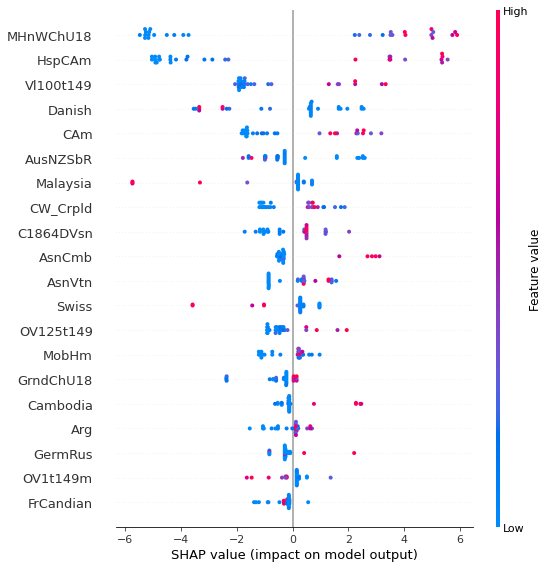

In [68]:
shap.summary_plot(shap_values, X_test)

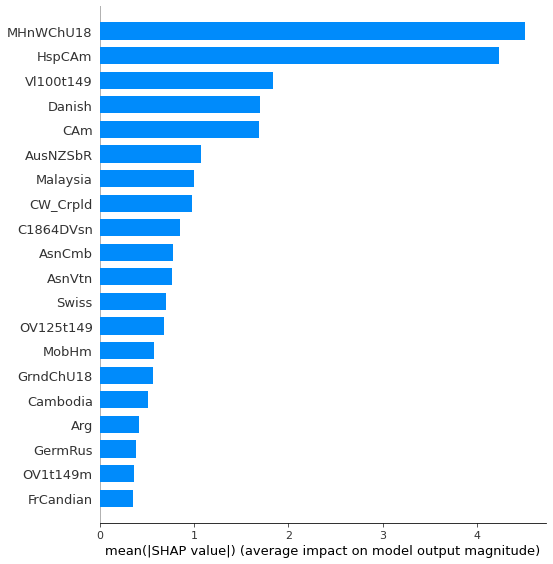

In [69]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

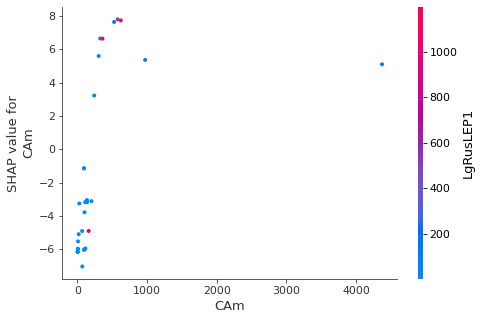

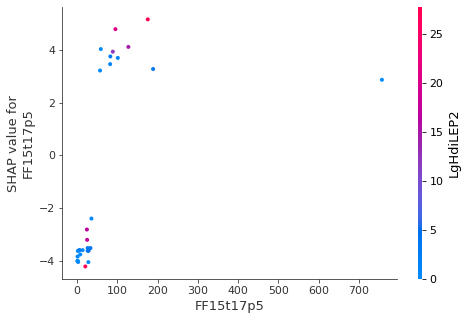

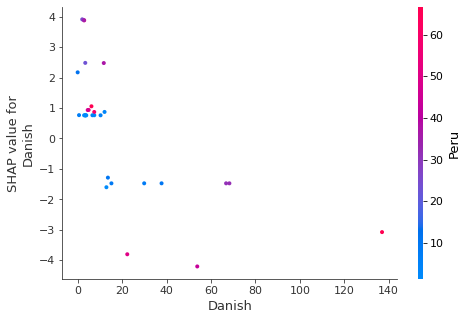

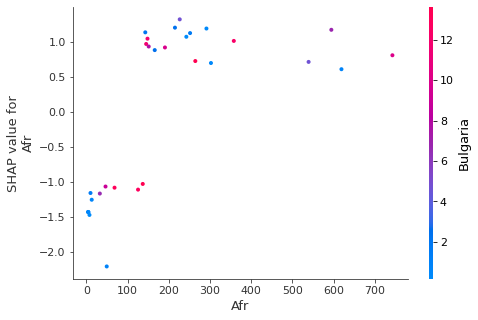

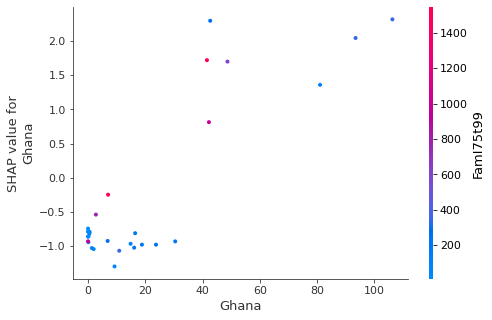

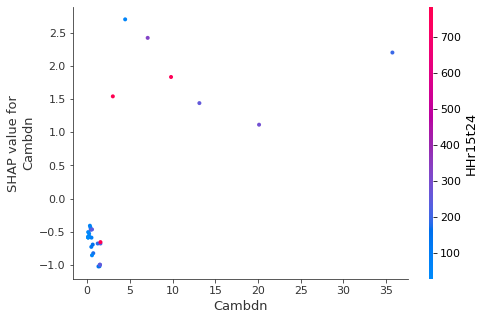

invalid value encountered in true_divide
invalid value encountered in true_divide


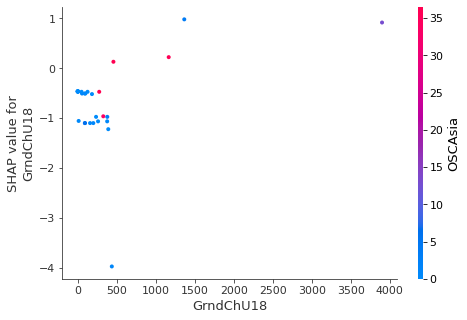

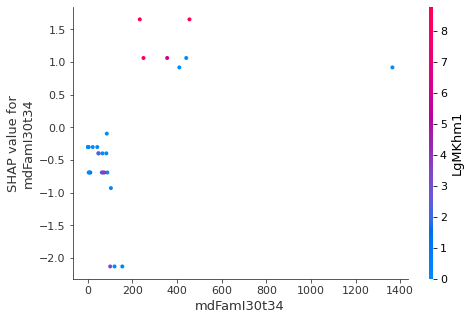

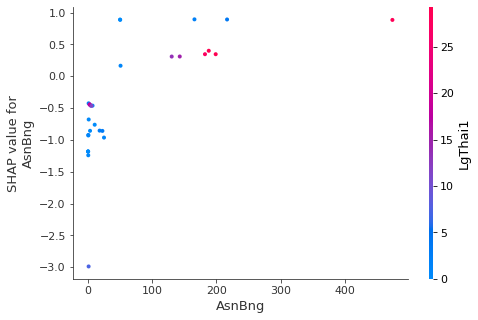

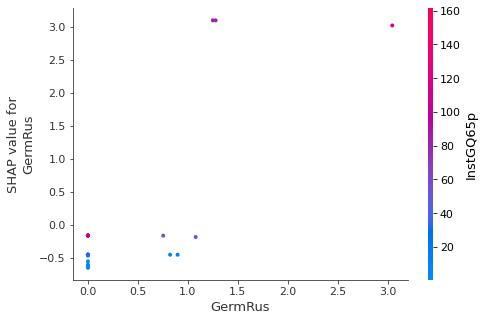

In [17]:
import numpy as np
# sort the features indexes by their importance in the model
# (sum of SHAP value magnitudes over the validation dataset)
top_inds = np.argsort(-np.sum(np.abs(shap_values), 0))

for i in range(10):
    shap.dependence_plot(top_inds[i], shap_values, X_test)

In [18]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer


cont_preprocessing = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler())

preprocess = make_column_transformer(
    (cont_preprocessing,list(X.columns)))


In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

pipe = Pipeline([('scaler', StandardScaler()),
                 ('regressor', LinearRegression())])

# check out searchgrid for more convenience
param_grid = [{'regressor': [LinearRegression()],
               'scaler': [preprocess]},
              
              {'regressor': [Ridge()],
                'scaler': [preprocess],
                #'regressor__alpha': np.geomspace(10**-5, 10**5,11)
              },
              
              {'regressor': [Lasso()],
               'scaler': [preprocess],              
               #'regressor__alpha': np.geomspace(10**-5, 10**5,11)
              },
              
              
              {'regressor': [ElasticNet()],
               'scaler': [preprocess],               
               #'regressor__alpha': np.geomspace(10**-5, 10**5,11)
              }
              
             ]
grid = GridSearchCV(pipe, param_grid)

In [20]:
grid.fit(X_train, y_train)
print("best cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))
grid.best_estimator_.score(X_test,y_test)

best cross-validation score: -1.553
best parameters: {'regressor': ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False), 'scaler': ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('pipeline',
                                 Pipeline(memory=None,
                                          steps=[('simpleimputer',
                                                  SimpleImputer(add_indicator=False,
                                                                copy=True,
                                                                fill_value=None,
                                                                missing_values=nan,
                                                                strategy='median',
      

-0.4352707813802672